Hola **Uriel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

Paso 1. Abre el archivo de datos y estudia la información general 

Ruta de archivo:

/datasets/games.csv 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st
from matplotlib.patches import Patch

In [2]:
juegos = pd.read_csv('/datasets/games.csv')
juegos


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Paso 2. Prepara los datos

Reemplaza los nombres de las columnas (ponlos en minúsculas).

Convierte los datos en los tipos necesarios.

Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Si es necesario, elige la manera de tratar los valores ausentes:
Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
Presta atención a la abreviatura TBD: significa "to be determined" (a determinar).

Especifica cómo piensas manejar estos casos.
Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.


Reemplaza los nombres de las columnas (ponlos en minúsculas)

In [3]:
juegos.columns = [col.lower() for col in juegos.columns]
juegos.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Cambiar los nombres para que sean más accesibles ayuda con la agilidad al momento de hacer algún tratamiento de tus datos.
   
</div>

Convierte los datos en los tipos necesarios.

In [4]:
juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
juegos['user_score']=pd.to_numeric(juegos['user_score'],errors='coerce')
juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


 Describe las columnas en las que los tipos de datos han sido cambiados[fue cambiado de objeto a flotante] y explica por qué.[por los pocos numeros que tenia en su informacion]

Se cambió el tipo de dato de la columna user_score de object a float64 usando pd.to_numeric() con errors='coerce'. Esto fue necesario porque esta columna contenía valores no numéricos como 'tbd' (que significa "to be determined"), lo cual impide que se realicen análisis numéricos o estadísticos. Al convertirlos con errors='coerce', los valores no numéricos se transforman en NaN, facilitando su tratamiento posterior.

In [6]:

juegos['critic_score'].mean()

68.96767850559173

In [7]:
juegos['user_score'].median()

7.5

In [8]:
juegos['rating'] = juegos['rating'].fillna('No clasificado')

In [9]:
juegos.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

In [10]:
ausentes=juegos['rating'].isna().sum()
totaldatasets=len(juegos)

ausentes/totaldatasets

0.0

Si es necesario, elige la manera de tratar los valores ausentes: Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco. 

¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles. [rellene los valores ausentes de la columna rating con la palabra 'No clasificado' para hacerlas calculos con mayor exactitud yo creo que los nan o valores ausentes estan ausentes por falta de informacion. ]

In [11]:
#Name Platform Year_of_Release Genre NA_sales EU_sales JP_sales  Other_sales Critic_Score User_Score Ratingjuegos['name'].unique()
#juegos['name'].unique()
#juegos['platform'].unique()
#juegos['year_of_release'].unique()
#juegos['genre'].unique()
#juegos['na_sales'].unique()
#juegos['eu_sales'].unique()
#juegos['jp_sales'].unique()
#juegos['other_sales'].unique()
#juegos['critic_score'].unique()
#juegos['user_score'].unique()
juegos['rating'].unique()

array(['E', 'No clasificado', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

 Presta atención a la abreviatura TBD: significa "to be determined" (a determinar).

 Especifica cómo piensas manejar estos casos. 

Se cambió el tipo de dato de la columna user_score de object a float64 usando pd.to_numeric() con errors='coerce'. Esto fue necesario porque esta columna contenía valores no numéricos como 'tbd' (que significa "to be determined"), lo cual impide que se realicen análisis numéricos o estadísticos. Al convertirlos con errors='coerce', los valores no numéricos se transforman en NaN, facilitando su tratamiento posterior.

Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [12]:
juegos['total_sales'] = juegos['na_sales'] + juegos['eu_sales'] + juegos['jp_sales'] + juegos['other_sales']
juegos['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

In [13]:
juegos.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No clasificado,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No clasificado,31.38


paso 3. Analiza los datos
-Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?


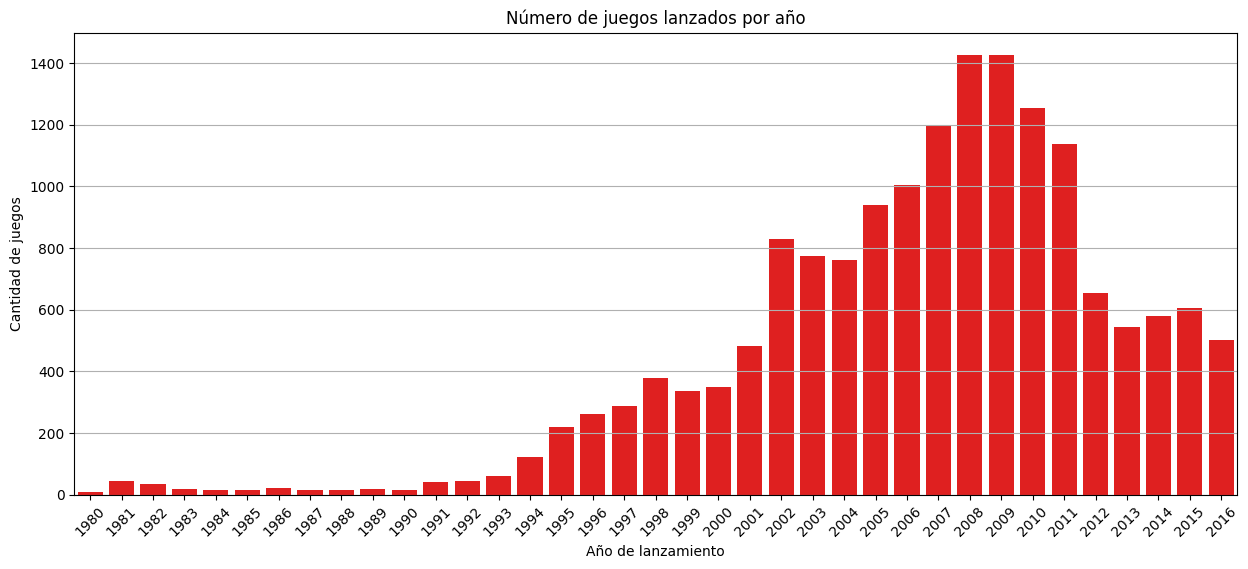

In [14]:
# Eliminamos temporalmente los valores faltantes para este análisis
juegos_por_año = juegos['year_of_release'].dropna().astype(int).value_counts().sort_index()

# Graficamos la cantidad de juegos por año
plt.figure(figsize=(15,6))
sns.barplot(x=juegos_por_año.index, y=juegos_por_año.values, color='red')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Incrementos o picos en el número de lanzamientos (2008 es uno común).
por su modernidad y la inovacion mas los gustos de los mercados por impulsar el gusto y actualizar la tecnologia en conjunto de los video juegos aprovecho ambas cosas para mejorar en elementos tecnnologicos como sistemas de video,audio,telefonia, ia, etc...
tras crusar estas fechas mientras el mercado de videojuegos bajaba los otro mercados en soffware, hardaware, telefonia y computacion  incremnetaba supongamos quera de la mismas enpresas "nadie pierde solo el producto cambia".


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo! Sin embargo, sería mejor mostrar una gráfica de líneas para poder analizar esto de mejor manera y poder identificar tendencias conforme pasa el tiempo
</div>

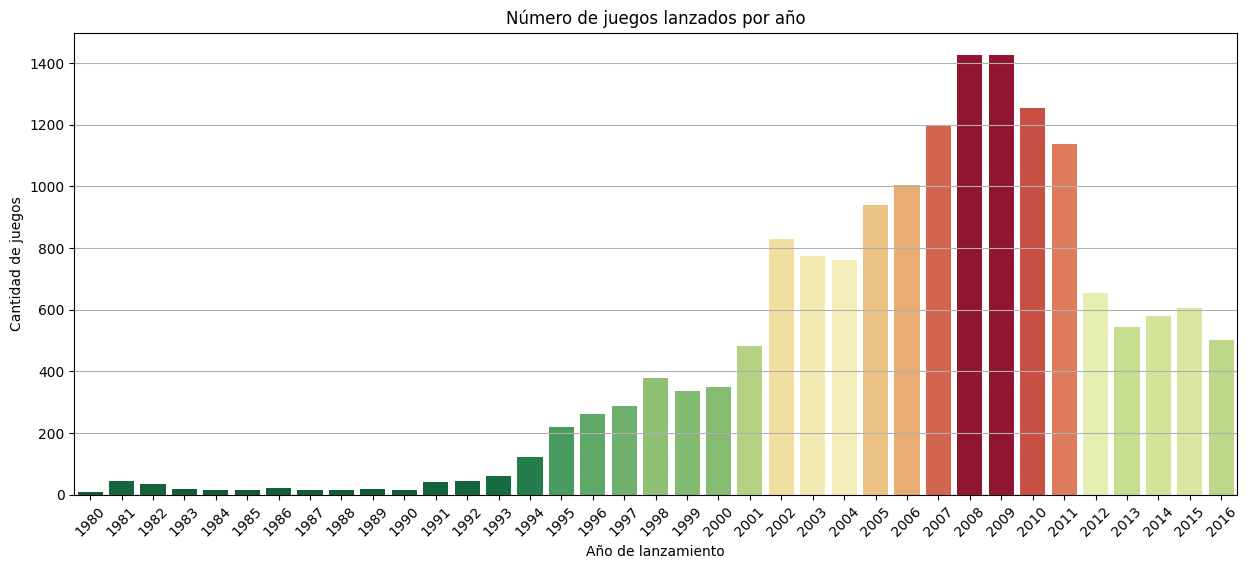

In [15]:
# 1. Obtener los valores de la cantidad de juegos
cantidad_juegos = juegos_por_año.values

# 2. Determinar el valor mínimo y máximo
min_juegos = cantidad_juegos.min()
max_juegos = cantidad_juegos.max()

# 3. Crear una lista de colores basada en la altura de las barras
# Usaremos una interpolación lineal entre verde y rojo
norm = plt.Normalize(min_juegos, max_juegos)
cmap = plt.cm.get_cmap('RdYlGn_r') # 'RdYlGn_r' va de rojo a amarillo a verde (invertido con '_r')
colores = [cmap(norm(val)) for val in cantidad_juegos]

# Graficamos la cantidad de juegos por año con la paleta de colores personalizada
plt.figure(figsize=(15,6))
sns.barplot(x=juegos_por_año.index, y=cantidad_juegos, palette=colores)
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

aqui lo explico mejor los juegos
Años con muy pocos juegos (por ejemplo, antes de 1995).

Incrementos o picos en el número de lanzamientos (2008 es uno común)
tamabien cambian su color en la grafica indicando el mas potencial 

In [16]:
juegos_por_año.describe()


count      37.000000
mean      444.486486
std       451.557159
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: year_of_release, dtype: float64

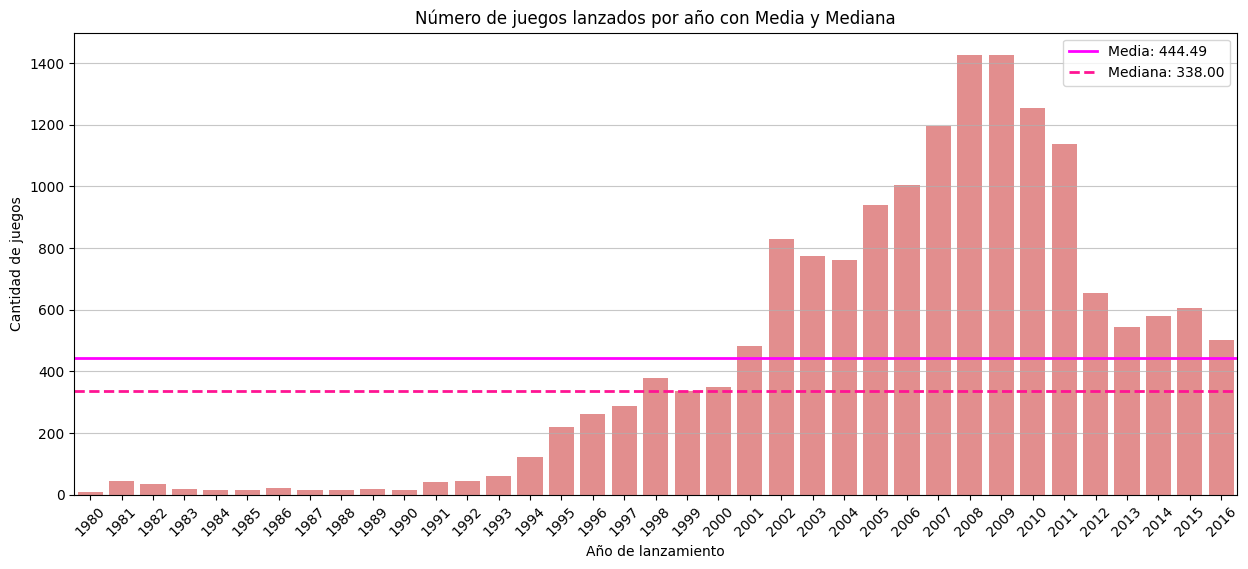

In [17]:
# (Tu código anterior para obtener juegos_por_año)
juegos_por_año = juegos['year_of_release'].dropna().astype(int).value_counts().sort_index()

# Calcular la media y la mediana de la cantidad de juegos
media_juegos = juegos_por_año.values.mean()
mediana_juegos = np.median(juegos_por_año.values)

# Graficamos la cantidad de juegos por año
plt.figure(figsize=(15,6))
sns.barplot(x=juegos_por_año.index, y=juegos_por_año.values, color='lightcoral') # Un color base para las barras

# Añadir la línea de la media
plt.axhline(media_juegos, color='magenta', linestyle='-', linewidth=2, label=f'Media: {media_juegos:.2f}')

# Añadir la línea de la mediana
plt.axhline(mediana_juegos, color='deeppink', linestyle='--', linewidth=2, label=f'Mediana: {mediana_juegos:.2f}')

plt.title('Número de juegos lanzados por año con Media y Mediana')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.7)
plt.legend() # Mostrar las etiquetas de las líneas
plt.show()

media y mediana en grafica

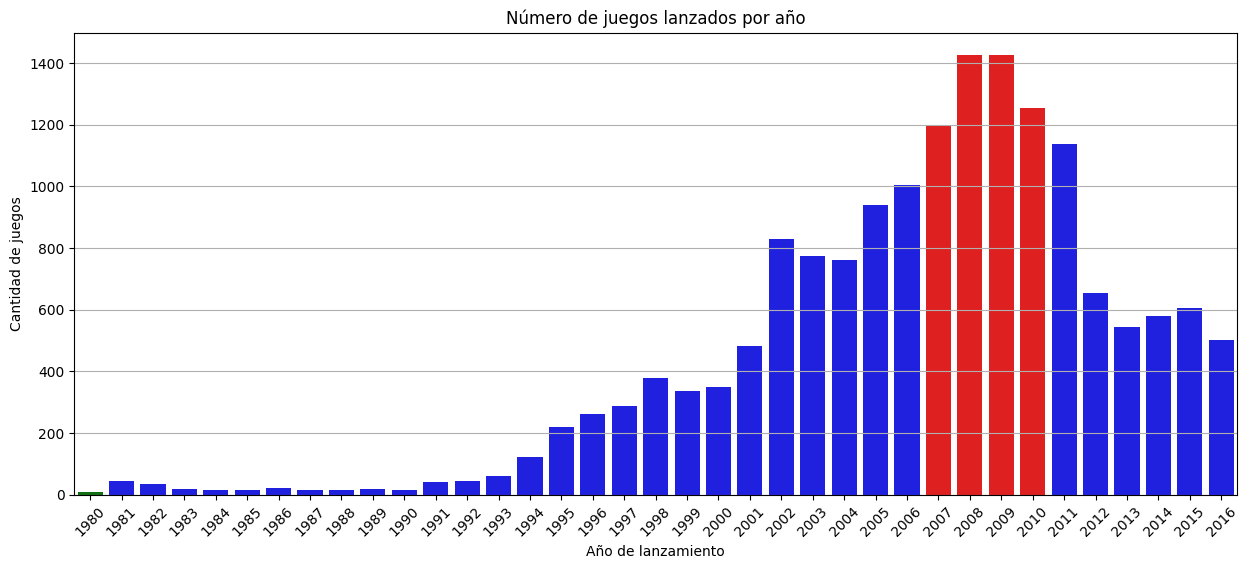

In [18]:
juegos_por_año = juegos['year_of_release'].dropna().astype(int).value_counts().sort_index()


# Obtener los valores de la cantidad de juegos
cantidad_juegos = juegos_por_año.values

# Determinar el valor máximo
max_juegos = cantidad_juegos.max()
min_juegos = cantidad_juegos.min()

# Definir un umbral (puedes ajustarlo según lo que consideres "alto" y "bajo")
umbral_alto = max_juegos * 0.8  # Consideramos "alto" el 80% del máximo
umbral_bajo = min_juegos * 1.2  # Consideramos "bajo" el 120% del mínimo (para evitar que todas sean bajas si el mínimo es > 0)

# Crear una lista de colores basada en umbrales
colores_puros = []
for cantidad in cantidad_juegos:
    if cantidad >= umbral_alto:
        colores_puros.append('red')
    elif cantidad <= umbral_bajo:
        colores_puros.append('green')
    else:
        colores_puros.append('blue') # Un color neutro para los valores intermedios

# Graficamos la cantidad de juegos por año con la paleta de colores personalizada
plt.figure(figsize=(15,6))
sns.barplot(x=juegos_por_año.index, y=cantidad_juegos, palette=colores_puros)
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

años del alsa en los video juego que propicio las gancias para mejorar la tecnologia y dar caida en este mercado abriendo otros mercados en la tecnologia.

-Observa cómo varían las ventas de una plataforma a otra.

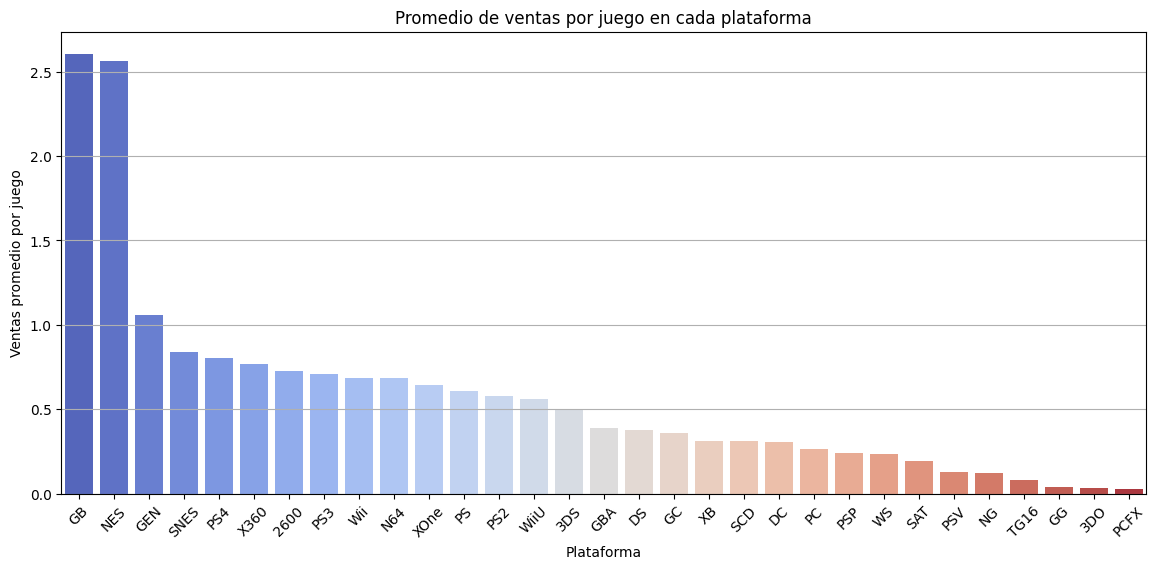

In [19]:
promedio_ventas = juegos.groupby('platform')['total_sales'].mean().sort_values(ascending=False)


plt.figure(figsize=(14,6))
sns.barplot(x=promedio_ventas.index, y=promedio_ventas.values, palette='coolwarm')
plt.title('Promedio de ventas por juego en cada plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas promedio por juego')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


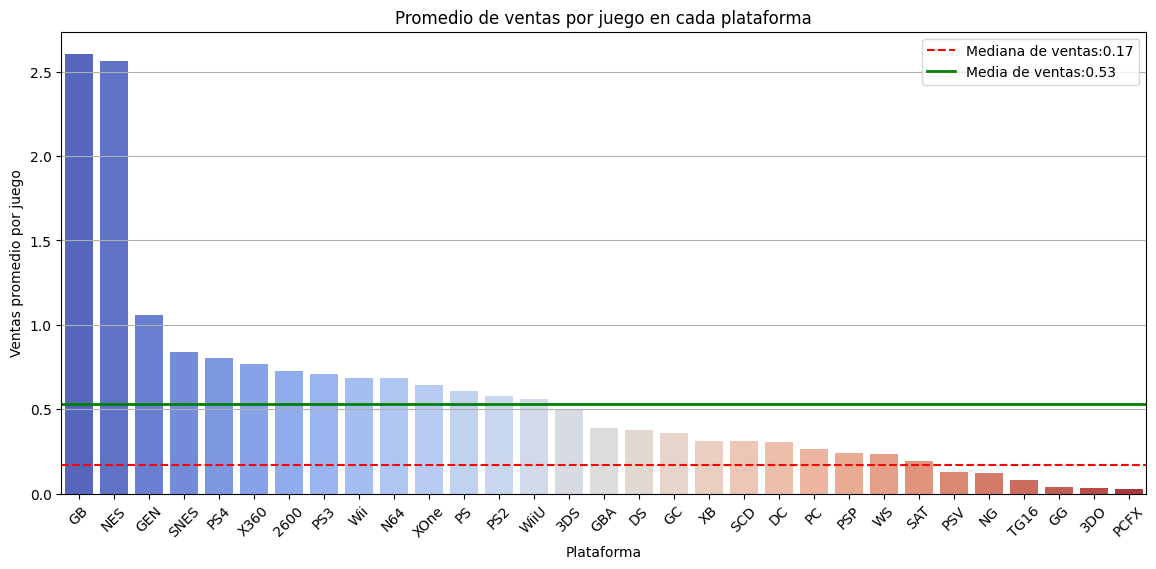

In [20]:
# Calcular la media de todas las ventas totales
media_ventas = juegos['total_sales'].mean()

# Calcular la mediana de todas las ventas totales
mediana_ventas = juegos['total_sales'].median()

plt.figure(figsize=(14,6))
sns.barplot(x=promedio_ventas.index, y=promedio_ventas.values, palette='coolwarm')
plt.title('Promedio de ventas por juego en cada plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas promedio por juego')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Añadir la línea horizontal para la mediana
plt.axhline(mediana_ventas, color='r', linestyle='--', label=f'Mediana de ventas:{mediana_ventas:.2f}')
# Añadir la línea horizontal para la media
plt.axhline(media_ventas, color='g', linestyle='-', linewidth=2, label=f'Media de ventas:{media_ventas:.2f}')

plt.legend() # Mostrar la leyenda para ambas líneas

plt.show()

-Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. -Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [21]:
top_plataformas = juegos.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)
top_plataformas

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64

VENTAS DE LAS PLATAFORMAS MAS VENDIDAS

In [22]:
plataformas_top = top_plataformas.index.tolist()
plataformas_top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

NOMBRES DE LAS PLATAFORMAS MAS VENDIDAS

In [23]:
ventas_por_año = juegos.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Elegimos plataformas cuya última venta fue hace muchos años
ultimo_año = ventas_por_año.groupby('platform')['year_of_release'].max().sort_values()
ultimo_año

platform
2600    1989.0
GG      1992.0
SCD     1994.0
GEN     1994.0
NES     1994.0
3DO     1995.0
TG16    1995.0
NG      1996.0
PCFX    1996.0
SNES    1999.0
SAT     1999.0
WS      2001.0
GB      2001.0
N64     2002.0
PS      2003.0
GC      2007.0
GBA     2007.0
XB      2008.0
DC      2008.0
PS2     2011.0
DS      2013.0
PSP     2015.0
PS3     2016.0
PS4     2016.0
PSV     2016.0
3DS     2016.0
Wii     2016.0
WiiU    2016.0
X360    2016.0
PC      2016.0
XOne    2016.0
Name: year_of_release, dtype: float64

AÑOS ENQUE TUVIERON MEJOR VENTA

EL TIEMPO DE LAS PLATAFORMAS Y SU DURACION
Año de lanzamiento
Último año de ventas
Duración total activa en el mercado[Las plataformas tienen una vida activa proximadamente entre ?

In [24]:
vida_util = ventas_por_año.groupby('platform')['year_of_release'].agg(['min', 'max'])
vida_util['duración'] = vida_util['max'] - vida_util['min']
vida_util = vida_util.sort_values(by='duración', ascending=False)
vida_util.head(10)

,min,max,duración
platform,,,
PC,1985.0,2016.0,31.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
X360,2005.0,2016.0,11.0
PSP,2004.0,2015.0,11.0
PS2,2000.0,2011.0,11.0
NES,1983.0,1994.0,11.0
DC,1998.0,2008.0,10.0
Wii,2006.0,2016.0,10.0


-Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

In [25]:
periodo_modelo = juegos[(juegos['year_of_release'] >= 2013) & (juegos['year_of_release'] <= 2016)]
periodo_modelo

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No clasificado,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No clasificado,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01


¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

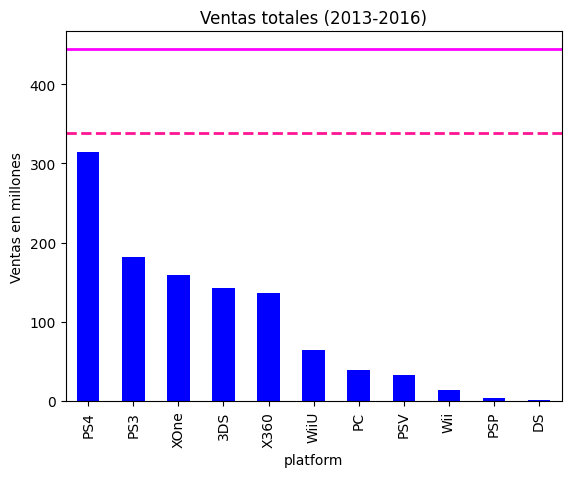

In [26]:
juegos_recientes = juegos[(juegos['year_of_release'] >= 2013) & (juegos['year_of_release'] <= 2016)]
periodo_modelo
juegos_recientes =periodo_modelo
#Calcular la media de todas las ventas totales
media_ventas = juegos_recientes.mean()

#Calcular la mediana de todas las ventas totales
mediana_ventas = juegos_recientes.median()



# Añadir la línea de la media
plt.axhline(media_juegos, color='magenta', linestyle='-', linewidth=2, label=f'Media: {media_juegos:.2f}')

# Añadir la línea de la mediana
plt.axhline(mediana_juegos, color='deeppink', linestyle='--', linewidth=2, label=f'Mediana: {mediana_juegos:.2f}')


# Promedio anual de ventas por plataforma desde 2013
ventas_recientes = juegos_recientes.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
ventas_recientes.plot(kind='bar', title='Ventas totales (2013-2016)', color='blue')
plt.ylabel('Ventas en millones')
plt.show()

In [27]:
juegos_group_recientes=juegos_recientes.groupby(['genre','name'])['total_sales'].sum().reset_index()
juegos_group_recientes

,genre,name,total_sales
0,Action,3rd Super Robot Wars Z: Tengoku-Hen,0.34
1,Action,7 Days to Die,0.19
2,Action,A Good Librarian Like a Good Shepherd: Library...,0.03
3,Action,Abunai: Koi no Sousa Shitsu,0.02
4,Action,Adventure Time: Explore the Dungeon Because I ...,0.29
...,...,...,...
1258,Strategy,Total War: Rome II,0.72
1259,Strategy,Total War: WARHAMMER,0.13
1260,Strategy,Ultraman Star Chronicles,0.02
1261,Strategy,War for the Overworld,0.01


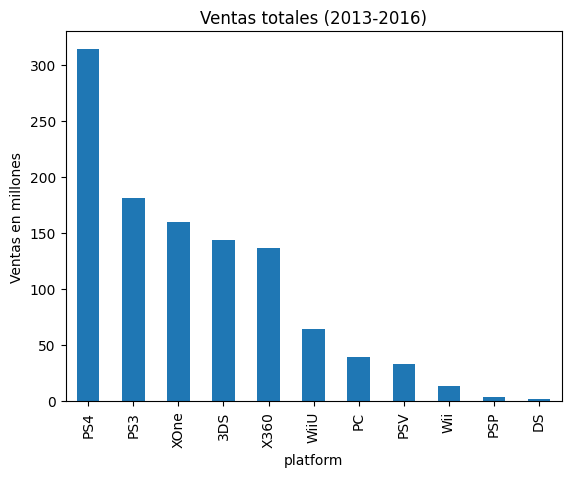

In [28]:
# Promedio anual de ventas por plataforma desde 2013
ventas_recientes = juegos_recientes.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
ventas_recientes.plot(kind='bar', title='Ventas totales (2013-2016)')
plt.ylabel('Ventas en millones')
plt.show()



In [29]:
# Paso 1: Filtramos las plataformas que tuvieron ventas hasta 2016 (último año de ventas registrado)
ventas_por_año = juegos.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Paso 2: Filtrar plataformas activas hasta 2016
# Obtener el último año de ventas para cada plataforma
ultimo_año_ventas = ventas_por_año.groupby('platform')['year_of_release'].max().reset_index()

# Solo conservamos las plataformas que tuvieron ventas hasta 2016 (que es el último año completo en los datos)
plataformas_activas_hasta_2016 = ultimo_año_ventas[ultimo_año_ventas['year_of_release'] <= 2016]

# Paso 3: Crear un DataFrame filtrado solo con juegos que fueron lanzados hasta 2016 y pertenecen a las plataformas activas
juegos_2016 = juegos[juegos['platform'].isin(plataformas_activas_hasta_2016['platform'])]

# Verificamos la información de las plataformas activas
f"Plataformas activas hasta 2016: {plataformas_activas_hasta_2016['platform'].tolist()}"

# Paso 4: Filtrar el DataFrame para que solo incluya juegos lanzados hasta 2016
juegos_para_modelo = juegos_2016[juegos_2016['year_of_release'] <= 2016]

# Paso 5: Ver cuántos juegos hay en este período
f"Cantidad de juegos disponibles hasta 2016: {juegos_para_modelo.shape[0]}"

# Paso 6: Visualizamos los primeros registros para asegurarnos de que los datos están correctos
juegos_para_modelo.head()

# Paso 7: Ver los años disponibles en los datos filtrados
#años_disponibles = juegos_para_modelo['year_of_release'].unique()
#f"Años disponibles para el modelo: {sorted(años_disponibles)}"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No clasificado,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No clasificado,31.38


-Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos

In [30]:
print(juegos_recientes['total_sales'].dtype)

float64


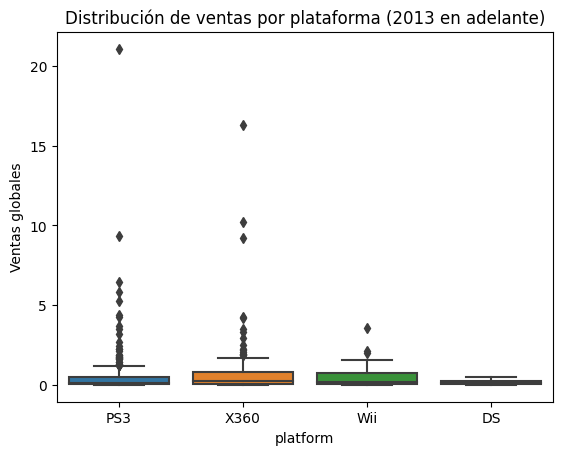

In [31]:
top_plataformas_con_datos = juegos_recientes[juegos_recientes['platform'].isin(plataformas_top)]['platform'].unique()
data_plot = juegos_recientes[juegos_recientes['platform'].isin(top_plataformas_con_datos)]

sns.boxplot(x='platform', y='total_sales', data=data_plot)
plt.title('Distribución de ventas por plataforma (2013 en adelante)')
plt.ylabel('Ventas globales')
plt.show()

diagramas de caja son complejos indican clara mente una linea de caida

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente, realizaste análisis super detallados de cada gráfica y cálculo realizado, buen trabajo! Mantén siempre la buena práctica de redactar interpretaciones de las gráficas para facilitar la comprensión del proceso de análisis
</div>

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

/tmp/ipykernel_162/1852951420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plot.sort_values(by='total_sales', inplace=True)


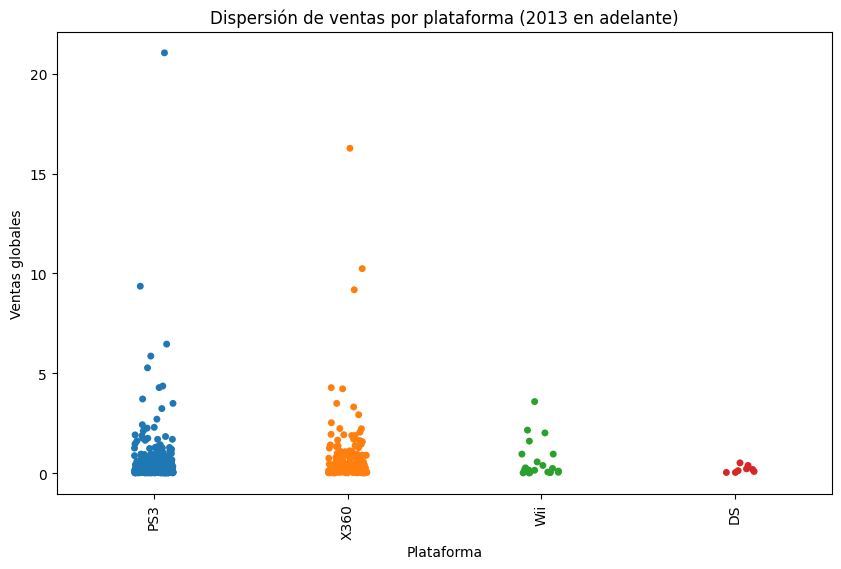

In [32]:
data_plot.sort_values(by='total_sales', inplace=True)
plt.figure(figsize=(10,6))
sns.stripplot(x='platform', y='total_sales', data=data_plot)

plt.title('Dispersión de ventas por plataforma (2013 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.xticks(rotation=90)
plt.show()

In [33]:
data_plot.groupby('platform')['total_sales'].size()

platform
DS        8
PS3     345
Wii      23
X360    186
Name: total_sales, dtype: int64

/tmp/ipykernel_162/3319524484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plot.sort_values(by='total_sales', inplace=True)


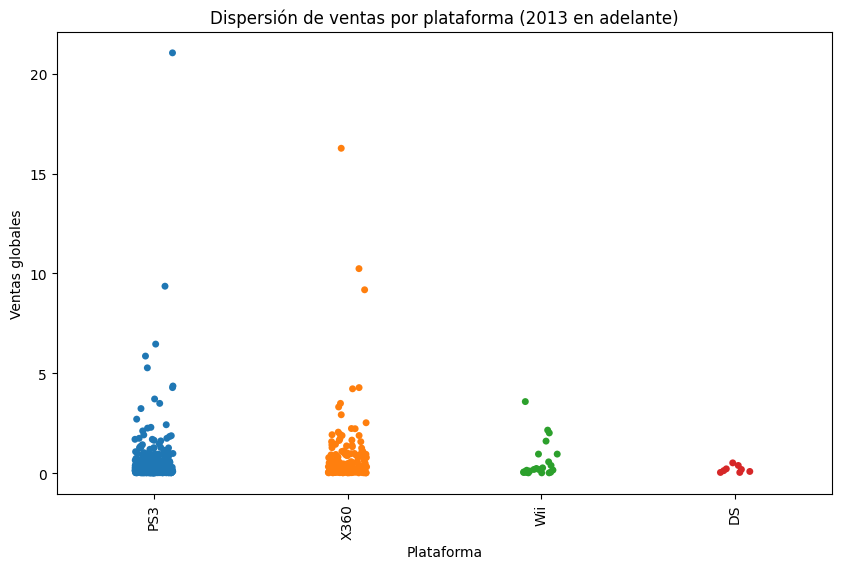

In [34]:
data_plot.sort_values(by='total_sales', inplace=True)
plt.figure(figsize=(10,6))
sns.stripplot(x='platform', y='total_sales', data=data_plot)

plt.title('Dispersión de ventas por plataforma (2013 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.xticks(rotation=90) 
plt.show()


In [35]:
data_plot.groupby('platform')['total_sales'].size()

platform
DS        8
PS3     345
Wii      23
X360    186
Name: total_sales, dtype: int64

In [36]:
juegos.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No clasificado,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No clasificado,31.38


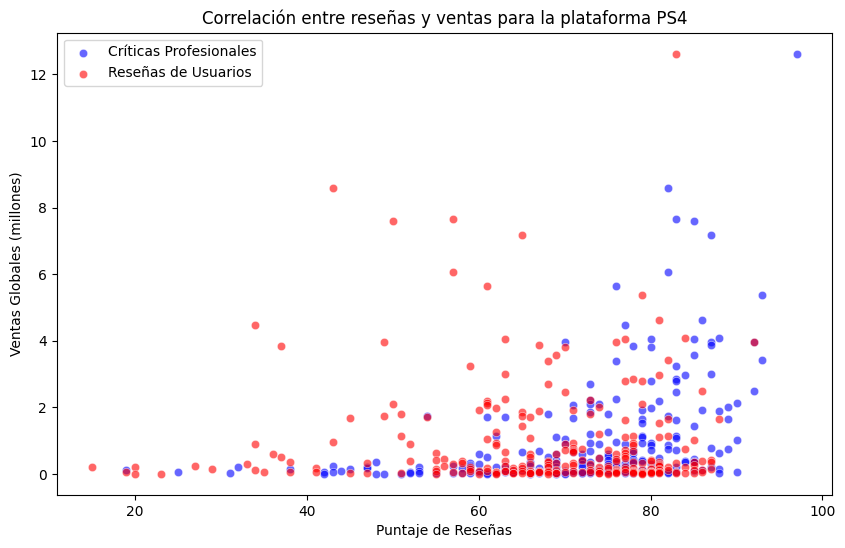

Correlación entre críticas profesionales y ventas: 0.41
Correlación entre reseñas de usuarios y ventas: -0.03


In [37]:
# Elige una plataforma popular para analizar, por ejemplo, 'PS4'
plataforma_analizar = 'PS4'

# Filtrar los datos para la plataforma seleccionada
data_plataforma = juegos_recientes[juegos_recientes['platform'] == plataforma_analizar]

# Filtrar valores NaN en 'user_score' y 'critic_score' para la correlación
data_plataforma = data_plataforma.dropna(subset=['user_score', 'critic_score'])
data_plataforma['user_score']=data_plataforma['user_score']*10

# Crear el gráfico de dispersión entre 'critic_score' y 'total_sales'
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', data=data_plataforma, label='Críticas Profesionales', color='blue', alpha=0.6)
sns.scatterplot(x='user_score', y='total_sales', data=data_plataforma, label='Reseñas de Usuarios', color='red', alpha=0.6)

plt.title(f'Correlación entre reseñas y ventas para la plataforma {plataforma_analizar}')
plt.xlabel('Puntaje de Reseñas')
plt.ylabel('Ventas Globales (millones)')
plt.legend()
plt.show()

# Calcular la correlación entre las reseñas de los críticos y las ventas
correlacion_critic_sales = data_plataforma['critic_score'].corr(data_plataforma['total_sales'])

# Calcular la correlación entre las reseñas de los usuarios y las ventas
correlacion_user_sales = data_plataforma['user_score'].corr(data_plataforma['total_sales'])

print(f"Correlación entre críticas profesionales y ventas: {correlacion_critic_sales:.2f}")
print(f"Correlación entre reseñas de usuarios y ventas: {correlacion_user_sales:.2f}")

Hay una correlación moderadamente positiva entre las críticas profesionales (critic_score) y las ventas globales (total_sales).



Este tipo de análisis puede proporcionar una visión valiosa sobre cómo las reseñas afectan las decisiones de compra, pero también resalta la complejidad del mercado de videojuegos, donde muchos factores entran en juego.


In [38]:
(data_plataforma)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,43.0,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,57.0,M,7.66
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,50.0,E,7.60
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,65.0,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016.0,Action,0.01,0.00,0.00,0.00,42.0,23.0,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016.0,Adventure,0.01,0.00,0.00,0.00,70.0,68.0,T,0.01
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,75.0,No clasificado,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,79.0,T,0.01


In [39]:
juegos_recientes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No clasificado,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No clasificado,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01


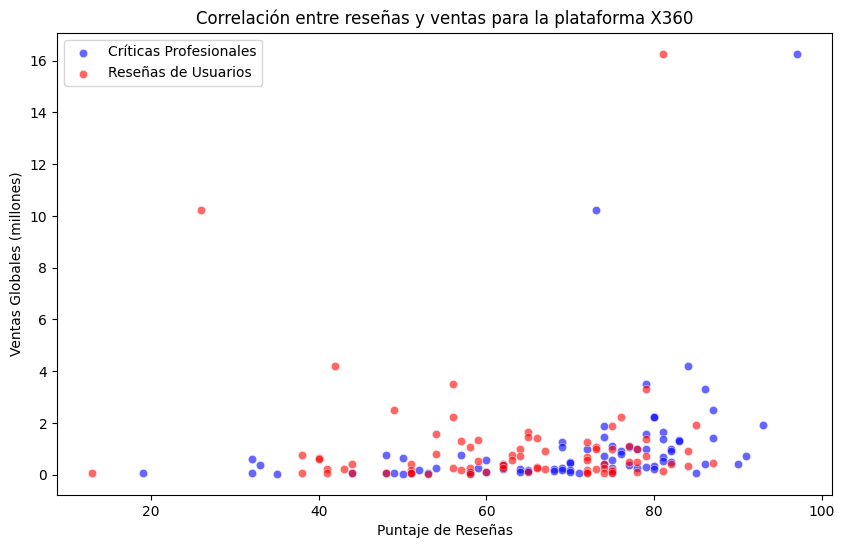

Correlación entre críticas profesionales y ventas: 0.35
Correlación entre reseñas de usuarios y ventas: -0.01


In [40]:
# Elige una plataforma popular para analizar, por ejemplo, 'x360'
plataforma_analizar = 'X360'

# Filtrar los datos para la plataforma seleccionada
data_plataforma = juegos_recientes[juegos_recientes['platform'] == plataforma_analizar]

# Filtrar valores NaN en 'user_score' y 'critic_score' para la correlación
data_plataforma = data_plataforma.dropna(subset=['user_score', 'critic_score'])
data_plataforma['user_score']=data_plataforma['user_score']*10

# Crear el gráfico de dispersión entre 'critic_score' y 'total_sales'
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', data=data_plataforma, label='Críticas Profesionales', color='blue', alpha=0.6)
sns.scatterplot(x='user_score', y='total_sales', data=data_plataforma, label='Reseñas de Usuarios', color='red', alpha=0.6)

plt.title(f'Correlación entre reseñas y ventas para la plataforma {plataforma_analizar}')
plt.xlabel('Puntaje de Reseñas')
plt.ylabel('Ventas Globales (millones)')
plt.legend()
plt.show()

# Calcular la correlación entre las reseñas de los críticos y las ventas
correlacion_critic_sales = data_plataforma['critic_score'].corr(data_plataforma['total_sales'])

# Calcular la correlación entre las reseñas de los usuarios y las ventas
correlacion_user_sales = data_plataforma['user_score'].corr(data_plataforma['total_sales'])

print(f"Correlación entre críticas profesionales y ventas: {correlacion_critic_sales:.2f}")
print(f"Correlación entre reseñas de usuarios y ventas: {correlacion_user_sales:.2f}")

In [41]:
(data_plataforma)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,26.0,M,10.24
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,42.0,E,4.22
380,Battlefield 4,X360,2013.0,Shooter,2.15,1.01,0.02,0.31,79.0,56.0,M,3.49
410,Assassin's Creed IV: Black Flag,X360,2013.0,Action,1.90,1.11,0.01,0.29,86.0,79.0,M,3.31
...,...,...,...,...,...,...,...,...,...,...,...,...
12751,Tropico 5,X360,2014.0,Simulation,0.03,0.02,0.00,0.00,71.0,72.0,T,0.05
12822,Ride to Hell,X360,2013.0,Racing,0.04,0.01,0.00,0.01,19.0,13.0,M,0.06
13059,Sacred 3,X360,2014.0,Role-Playing,0.03,0.02,0.00,0.00,51.0,41.0,M,0.05
13414,Yaiba: Ninja Gaiden Z,X360,2014.0,Action,0.03,0.01,0.00,0.00,50.0,53.0,M,0.04


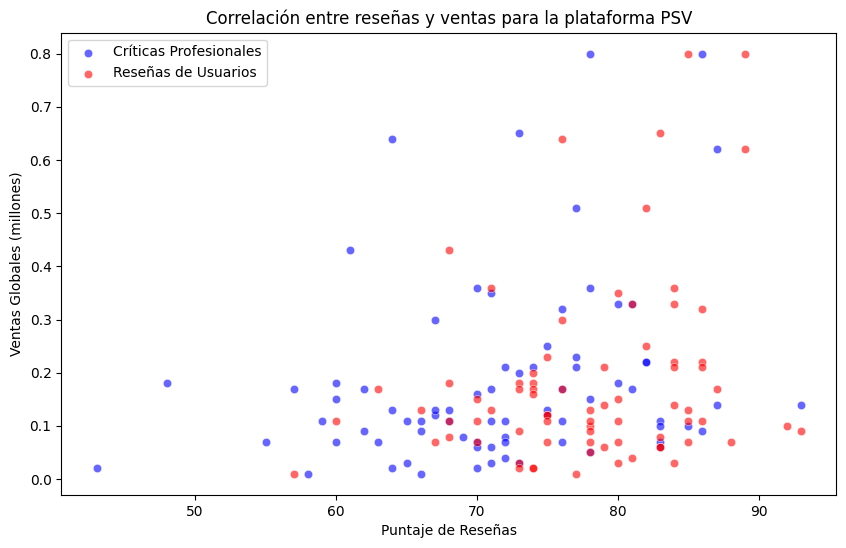

Correlación entre críticas profesionales y ventas: 0.25
Correlación entre reseñas de usuarios y ventas: 0.27


In [42]:
# Elige una plataforma popular para analizar, por ejemplo, PSV
plataforma_analizar = 'PSV'

# Filtrar los datos para la plataforma seleccionada
data_plataforma = juegos_recientes[juegos_recientes['platform'] == plataforma_analizar]

# Filtrar valores NaN en 'user_score' y 'critic_score' para la correlación
data_plataforma = data_plataforma.dropna(subset=['user_score', 'critic_score'])
data_plataforma['user_score']=data_plataforma['user_score']*10

# Crear el gráfico de dispersión entre 'critic_score' y 'total_sales'
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', data=data_plataforma, label='Críticas Profesionales', color='blue', alpha=0.6)
sns.scatterplot(x='user_score', y='total_sales', data=data_plataforma, label='Reseñas de Usuarios', color='red', alpha=0.6)

plt.title(f'Correlación entre reseñas y ventas para la plataforma {plataforma_analizar}')
plt.xlabel('Puntaje de Reseñas')
plt.ylabel('Ventas Globales (millones)')
plt.legend()
plt.show()

# Calcular la correlación entre las reseñas de los críticos y las ventas
correlacion_critic_sales = data_plataforma['critic_score'].corr(data_plataforma['total_sales'])

# Calcular la correlación entre las reseñas de los usuarios y las ventas
correlacion_user_sales = data_plataforma['user_score'].corr(data_plataforma['total_sales'])

print(f"Correlación entre críticas profesionales y ventas: {correlacion_critic_sales:.2f}")
print(f"Correlación entre reseñas de usuarios y ventas: {correlacion_user_sales:.2f}")

In [43]:
(data_plataforma)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2566,Killzone: Mercenary,PSV,2013.0,Shooter,0.20,0.39,0.04,0.17,78.0,89.0,M,0.80
2569,Final Fantasy X / X-2 HD Remaster,PSV,2013.0,Role-Playing,0.16,0.24,0.28,0.12,86.0,85.0,T,0.80
3086,Freedom Wars,PSV,2014.0,Role-Playing,0.15,0.10,0.32,0.08,73.0,83.0,T,0.65
3127,Borderlands 2,PSV,2014.0,Shooter,0.32,0.16,0.01,0.15,64.0,76.0,M,0.64
3296,Tearaway,PSV,2013.0,Adventure,0.14,0.34,0.00,0.14,87.0,89.0,E,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...
14811,XBLAZE Code: Embryo,PSV,2013.0,Adventure,0.01,0.00,0.01,0.00,43.0,74.0,M,0.02
15198,Psycho-Pass: Mandatory Happiness,PSV,2016.0,Adventure,0.00,0.01,0.01,0.00,64.0,73.0,T,0.02
15512,Dynasty Warriors 8: Empires,PSV,2015.0,Action,0.00,0.00,0.02,0.00,70.0,74.0,T,0.02
16260,htoL#NiQ: The Firefly Diary,PSV,2014.0,Platform,0.00,0.00,0.01,0.00,58.0,77.0,T,0.01


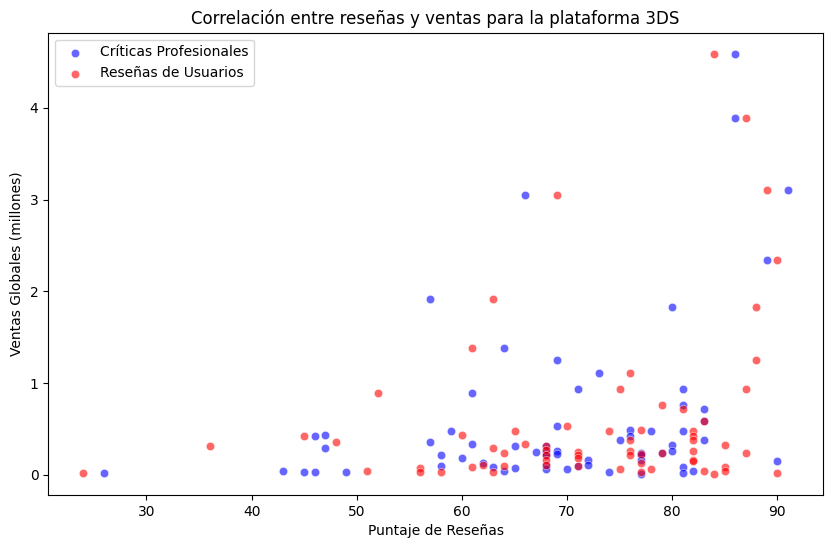

Correlación entre críticas profesionales y ventas: 0.34
Correlación entre reseñas de usuarios y ventas: 0.27


In [44]:
# Elige una plataforma popular para analizar, por ejemplo, PSV
plataforma_analizar = '3DS'

# Filtrar los datos para la plataforma seleccionada
data_plataforma = juegos_recientes[juegos_recientes['platform'] == plataforma_analizar]

# Filtrar valores NaN en 'user_score' y 'critic_score' para la correlación
data_plataforma = data_plataforma.dropna(subset=['user_score', 'critic_score'])
data_plataforma['user_score']=data_plataforma['user_score']*10

# Crear el gráfico de dispersión entre 'critic_score' y 'total_sales'
plt.figure(figsize=(10,6))
sns.scatterplot(x='critic_score', y='total_sales', data=data_plataforma, label='Críticas Profesionales', color='blue', alpha=0.6)
sns.scatterplot(x='user_score', y='total_sales', data=data_plataforma, label='Reseñas de Usuarios', color='red', alpha=0.6)

plt.title(f'Correlación entre reseñas y ventas para la plataforma {plataforma_analizar}')
plt.xlabel('Puntaje de Reseñas')
plt.ylabel('Ventas Globales (millones)')
plt.legend()
plt.show()

# Calcular la correlación entre las reseñas de los críticos y las ventas
correlacion_critic_sales = data_plataforma['critic_score'].corr(data_plataforma['total_sales'])

# Calcular la correlación entre las reseñas de los usuarios y las ventas
correlacion_user_sales = data_plataforma['user_score'].corr(data_plataforma['total_sales'])

print(f"Correlación entre críticas profesionales y ventas: {correlacion_critic_sales:.2f}")
print(f"Correlación entre reseñas de usuarios y ventas: {correlacion_user_sales:.2f}")

In [45]:
(data_plataforma)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
235,Luigi's Mansion: Dark Moon,3DS,2013.0,Action,1.80,1.39,1.11,0.29,86.0,84.0,E,4.59
312,Monster Hunter 4 Ultimate,3DS,2014.0,Role-Playing,0.68,0.48,2.62,0.11,86.0,87.0,T,3.89
448,The Legend of Zelda: A Link Between Worlds,3DS,2013.0,Action,1.40,1.01,0.46,0.23,91.0,89.0,E,3.10
457,Animal Crossing: Happy Home Designer,3DS,2015.0,Simulation,0.51,1.02,1.40,0.12,66.0,69.0,E,3.05
677,The Legend of Zelda: Majora's Mask 3D,3DS,2015.0,Action,1.15,0.55,0.47,0.17,89.0,90.0,E10+,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...
13984,Beyblade Evolution,3DS,2013.0,Action,0.02,0.01,0.00,0.00,49.0,63.0,E,0.03
14274,Yumi's Odd Odyssey,3DS,2013.0,Platform,0.00,0.00,0.03,0.00,74.0,77.0,E,0.03
15211,Phoenix Wright: Ace Attorney Trilogy,3DS,2014.0,Adventure,0.00,0.00,0.02,0.00,81.0,90.0,T,0.02
15521,Tenkai Knights: Brave Battle,3DS,2014.0,Action,0.01,0.01,0.00,0.00,26.0,24.0,E10+,0.02


Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con las correlaciones entre las diferentes variables, siempre es importante revisar que puede estar afectando a otro punto del análisis
</div>

POR PLATAFORMA Y JUEGOS UTILISARIA UN GROUP BY 

[EL GROUP BY QUE UTILICE SE MUESTRA EN EL EJERCICIO MAS ABAJO]
ya se me hiso noche asi que aqui algunos ejemplos del groupby y agunos usos
resultado = df.groupby('categoria')['valor'].sum()

comparacion = ['name'] == df['platform']

juegos.groupby['name'] == df['platform']


In [46]:
(juegos)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No clasificado,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No clasificado,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No clasificado,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No clasificado,0.01


In [47]:
(juegos).head(6)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No clasificado,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No clasificado,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,No clasificado,30.26


In [48]:
comparacion_juegos=juegos.groupby(['name','platform'])['total_sales'].sum()
comparacion_juegos

name                          platform
 Beyblade Burst               3DS         0.03
 Fire Emblem Fates            3DS         1.67
 Frozen: Olaf's Quest         3DS         0.59
                              DS          0.51
 Haikyu!! Cross Team Match!   3DS         0.04
                                          ... 
uDraw Studio                  Wii         2.42
uDraw Studio: Instant Artist  Wii         0.17
                              X360        0.02
wwe Smackdown vs. Raw 2006    PS2         3.00
¡Shin Chan Flipa en colores!  DS          0.14
Name: total_sales, Length: 16709, dtype: float64

In [49]:
conteo = juegos.groupby('name')['platform'].nunique()
juegos_multi = conteo[conteo > 1].index
comparacion_juegos = juegos[juegos['name'].isin(juegos_multi)]
comparacion_juegos = comparacion_juegos.groupby(['name','platform'])['total_sales'].sum().unstack().fillna(0)

In [50]:
comparacion_juegos=juegos.groupby(['name','platform'])['total_sales'].sum().unstack()
comparacion_juegos


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,NaN,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,NaN,NaN,0.59,NaN,0.51,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thinkSMART: Chess for Kids,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uDraw Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.42,NaN,NaN,NaN,NaN
uDraw Studio: Instant Artist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.17,NaN,0.02,NaN,NaN


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Por favor verifica la forma en la que se está realizando el cálculo, no se puede obtener un resultado lleno de valores ausentes, quizá unstack no es el método que deberías utilizar
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante: aqui mi correeccion</b> <a class=“tocSkip”></a>
</div>

In [51]:
comparacion_juegos = juegos.groupby(['name','platform'])['total_sales'].sum().unstack().fillna(0)
comparacion_juegos

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,0.0,0.0,0.03,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
Fire Emblem Fates,0.0,0.0,1.67,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
Frozen: Olaf's Quest,0.0,0.0,0.59,0.0,0.51,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
Haikyu!! Cross Team Match!,0.0,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
Tales of Xillia 2,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thinkSMART: Chess for Kids,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
uDraw Studio,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.42,0.0,0.00,0.0,0.0
uDraw Studio: Instant Artist,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.02,0.0,0.0


correccion

Respuesta del estudiante

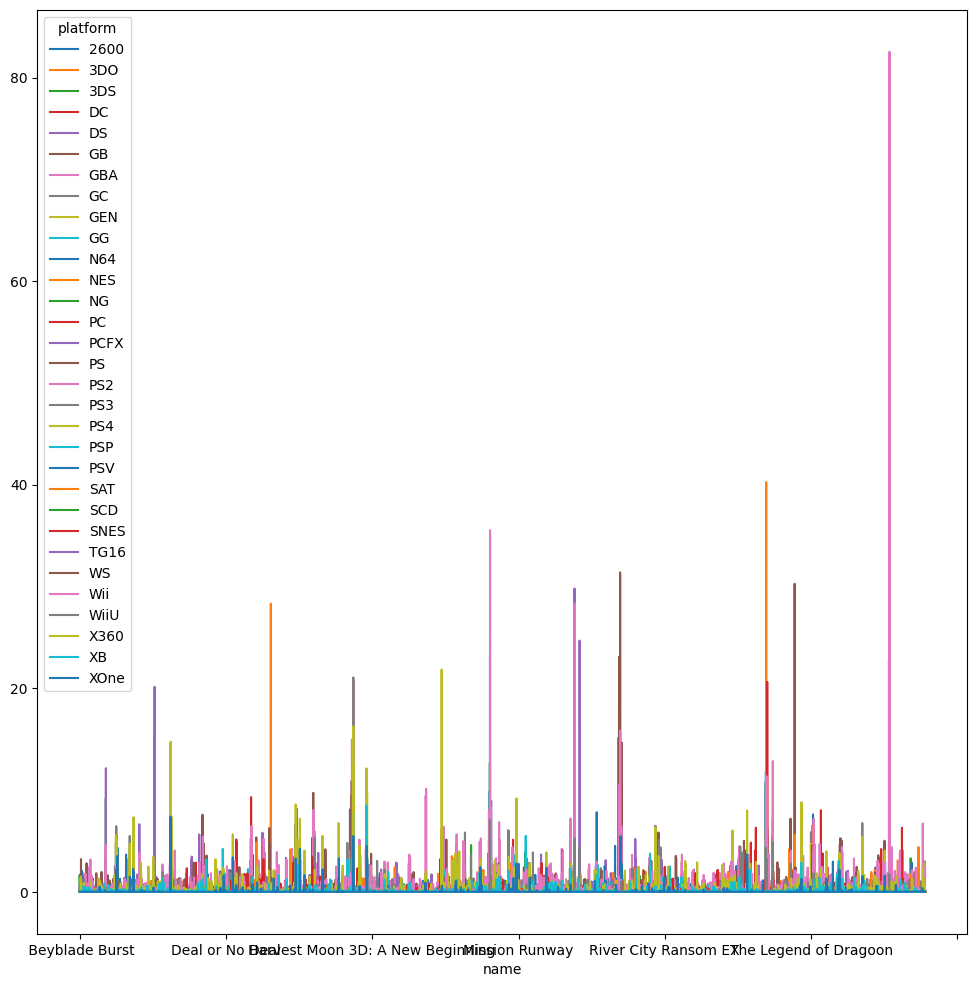

In [53]:
comparacion_juegos.plot(kind='line', figsize=(12,12))
plt.show()

In [54]:
print(comparacion_juegos.dtypes)

platform
2600    float64
3DO     float64
3DS     float64
DC      float64
DS      float64
GB      float64
GBA     float64
GC      float64
GEN     float64
GG      float64
N64     float64
NES     float64
NG      float64
PC      float64
PCFX    float64
PS      float64
PS2     float64
PS3     float64
PS4     float64
PSP     float64
PSV     float64
SAT     float64
SCD     float64
SNES    float64
TG16    float64
WS      float64
Wii     float64
WiiU    float64
X360    float64
XB      float64
XOne    float64
dtype: object


In [55]:
#ventas_por_juego_y_plataforma.head()

In [56]:
juegos_multiplataforma=juegos.groupby('name')['platform'].nunique()
juegos_multiplataforma = juegos_multiplataforma[juegos_multiplataforma > 5]
juegos_multiplataforma


name
007: Quantum of Solace                        6
Adventure Time: Finn & Jake Investigations    6
Angry Birds Star Wars                         8
Assassin's Creed IV: Black Flag               6
Avatar: The Game                              6
                                             ..
Warriors Orochi 3                             6
Watch Dogs                                    6
X-Men: The Official Game                      6
You Don't Know Jack                           6
pro evolution soccer 2011                     6
Name: platform, Length: 136, dtype: int64

<AxesSubplot:xlabel='platform'>

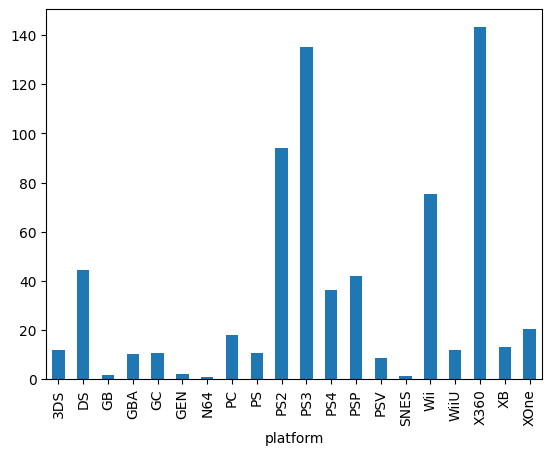

In [57]:
#juegos_multiplataforma['name')['platform']
kle=juegos[juegos['name'].isin(juegos_multiplataforma.index)].groupby('platform')['total_sales'].sum()
kle
kle.plot(kind='bar')

las graficas dejuegos por plataforma demas de 5 videojuegos de coincidencia

In [58]:
kle=juegos[juegos['name'].isin(juegos_multiplataforma.index)].groupby('platform')['total_sales'].sum()
kle

platform
3DS      11.70
DS       44.47
GB        1.73
GBA      10.23
GC       10.75
GEN       2.05
N64       0.72
PC       17.87
PS       10.68
PS2      94.15
PS3     135.24
PS4      36.11
PSP      42.02
PSV       8.57
SNES      1.38
Wii      75.17
WiiU     11.93
X360    143.33
XB       13.00
XOne     20.20
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='platform'>

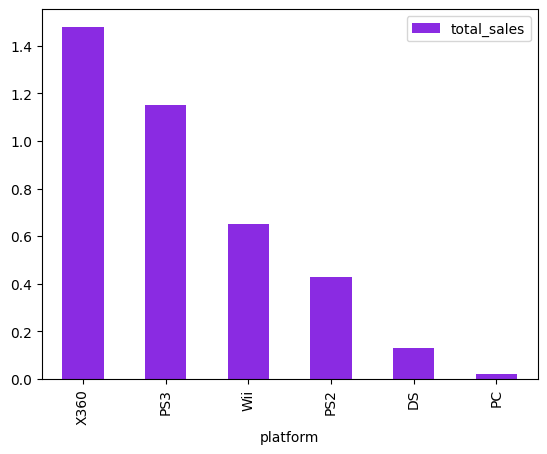

In [59]:
juegos[juegos['name']== '007: Quantum of Solace'].plot(kind='bar',x='platform', y='total_sales',color= 'blueviolet')


algunos ejemplos de videojuegos con sus coincidencias en varia plataformas y en que consola venden mas

<AxesSubplot:xlabel='platform'>

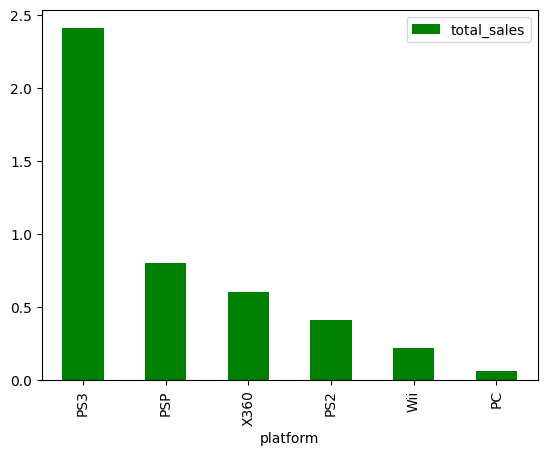

In [60]:
juegos[juegos['name']== 'pro evolution soccer 2011' ].plot(kind='bar',x='platform', y='total_sales',color= 'green')

ps3 rompio con las ventas en este productos por preferencia en su plataforma

5 juegos

<AxesSubplot:xlabel='platform'>

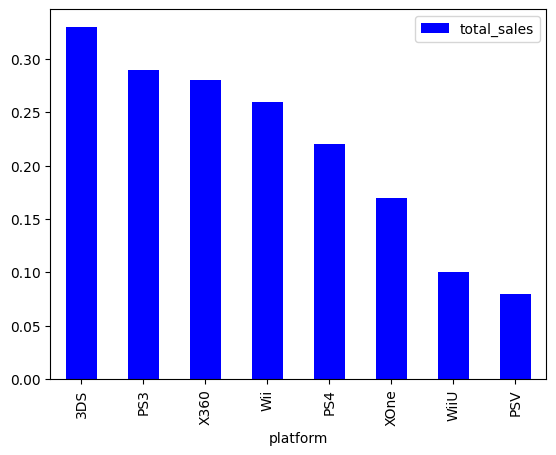

In [61]:
juegos[juegos['name']== 'Angry Birds Star Wars' ].plot(kind='bar',x='platform', y='total_sales',color= 'blue')

<AxesSubplot:xlabel='platform'>

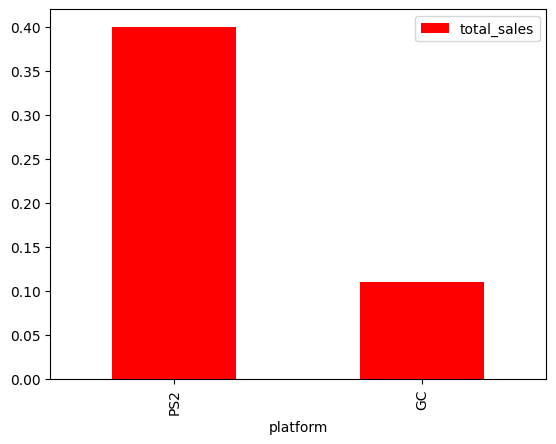

In [62]:
juegos[juegos['name']== '18 Wheeler: American Pro Trucker' ].plot(kind='bar',x='platform', y='total_sales',color= 'red')

<AxesSubplot:xlabel='platform'>

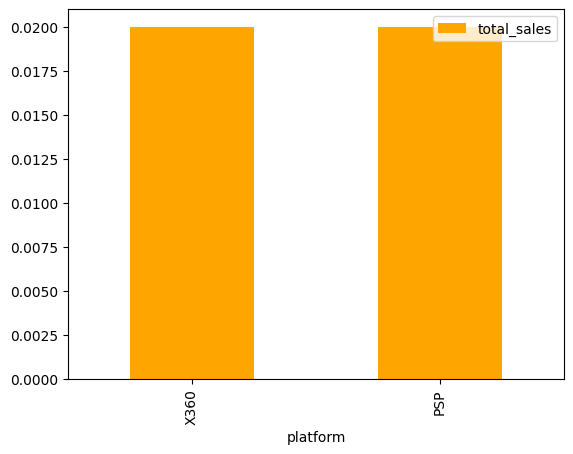

In [63]:
juegos[juegos['name']== '11eyes: CrossOver' ].plot(kind='bar',x='platform', y='total_sales',color= 'orange')

-Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [64]:
juegos_group_recientes=juegos_recientes.groupby(['genre','name'])['total_sales'].sum().reset_index()
juegos_group_recientes

,genre,name,total_sales
0,Action,3rd Super Robot Wars Z: Tengoku-Hen,0.34
1,Action,7 Days to Die,0.19
2,Action,A Good Librarian Like a Good Shepherd: Library...,0.03
3,Action,Abunai: Koi no Sousa Shitsu,0.02
4,Action,Adventure Time: Explore the Dungeon Because I ...,0.29
...,...,...,...
1258,Strategy,Total War: Rome II,0.72
1259,Strategy,Total War: WARHAMMER,0.13
1260,Strategy,Ultraman Star Chronicles,0.02
1261,Strategy,War for the Overworld,0.01


<AxesSubplot:xlabel='genre', ylabel='total_sales'>

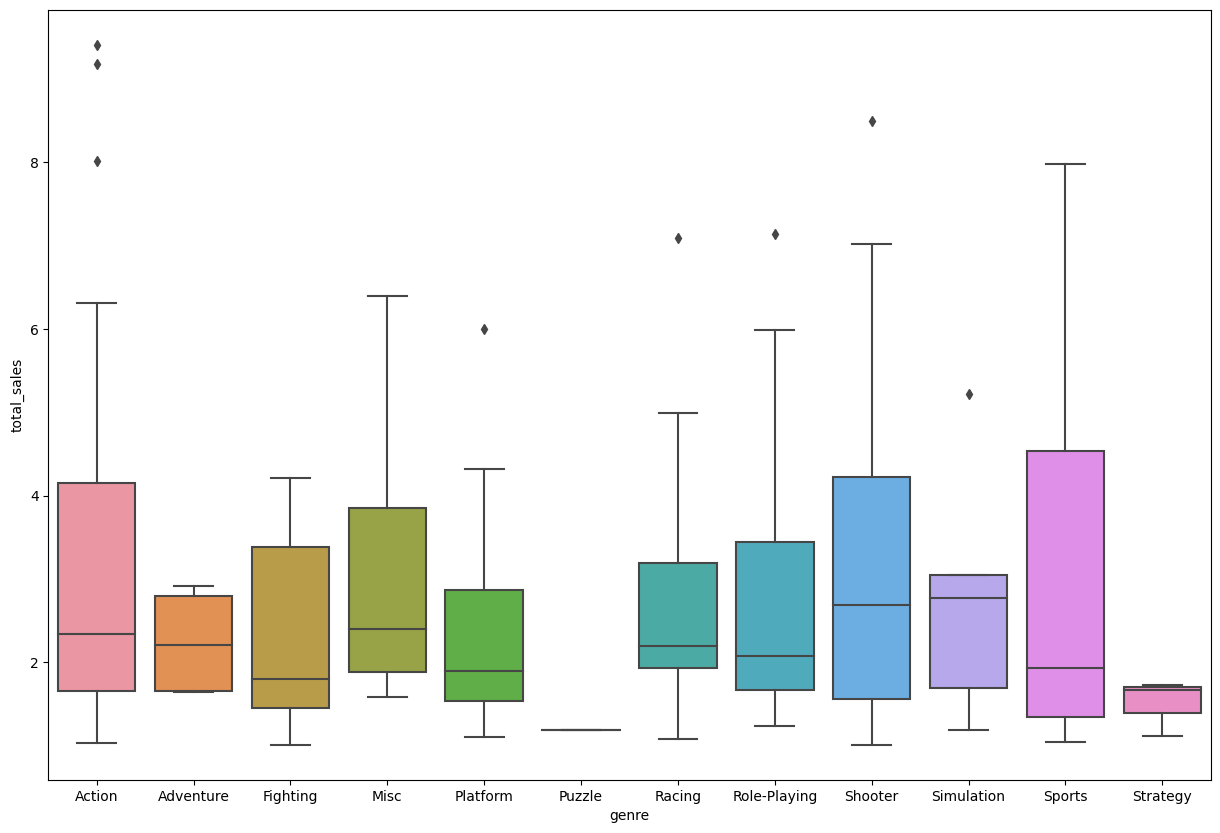

In [65]:
df_genre=juegos_group_recientes.query('1<total_sales<10')
plt.figure(figsize=(15,10) )
sns.boxplot(x='genre',y='total_sales',data=df_genre)


-EL GENERO MAS RENTABLE SERIA SPORTS.

-EL MENOS RENTABLE EN VENTAS ES PUZZLE.

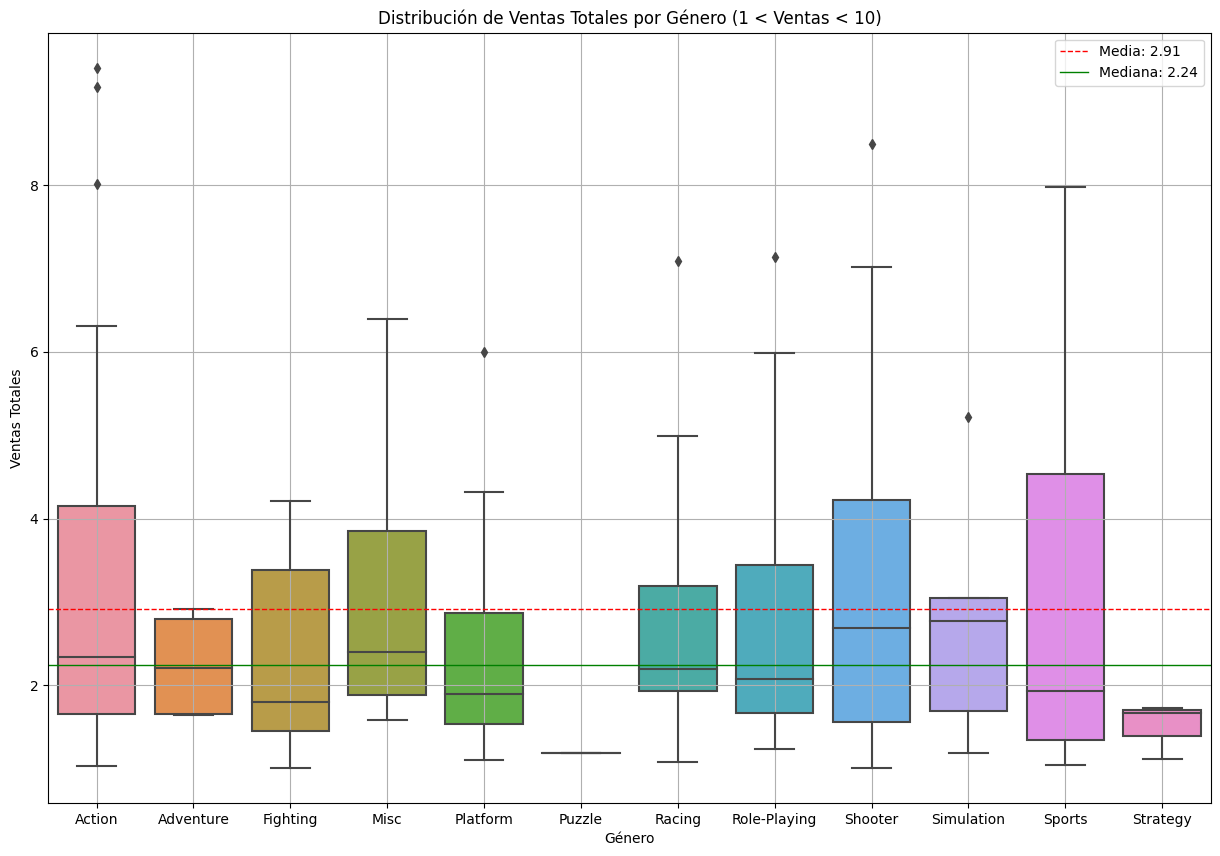

In [66]:
df_genre=juegos_group_recientes.query('1<total_sales<10')

plt.figure(figsize=(15,10) )
sns.boxplot(x='genre',y='total_sales',data=df_genre)

# Calcular la media y la mediana de las ventas totales
media_total = df_genre['total_sales'].mean()
mediana_total = df_genre['total_sales'].median()

# Agregar líneas horizontales para la media y la mediana
plt.axhline(media_total, color='red', linestyle='--', linewidth=1, label=f'Media: {media_total:.2f}')
plt.axhline(mediana_total, color='green', linestyle='-', linewidth=1, label=f'Mediana: {mediana_total:.2f}')

# Agregar leyenda para identificar las líneas
plt.legend()

plt.title('Distribución de Ventas Totales por Género (1 < Ventas < 10)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()

promedio

  platform  total_sales
0       DS         0.13
1       PC         0.02
2      PS2         0.43
3      PS3         1.15
4      Wii         0.65


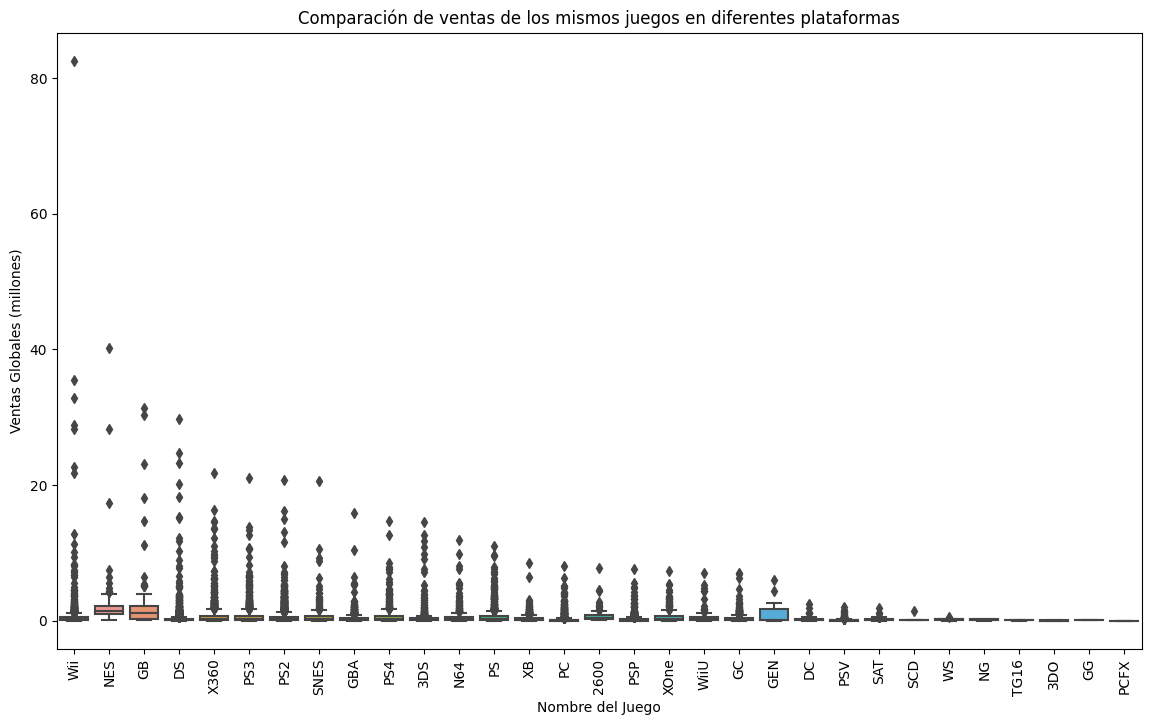

In [67]:
# Paso 1: Asegurarse de que los datos están limpios (por ejemplo, sin valores NaN en ventas)
# Filtramos los datos para mantener solo los juegos con ventas globales no nulas


# Paso 2: Agrupamos por nombre del juego y plataforma, sumando las ventas totales
ventas_por_juego_y_plataforma = juegos[juegos['name']=='007: Quantum of Solace'].groupby(['platform'])['total_sales'].sum().reset_index()

# Paso 3: Ver las primeras filas para asegurarnos que la agrupación se hizo bien
print(ventas_por_juego_y_plataforma.head())

# Paso 4: Crear un gráfico de barras o diagrama de caja para comparar las ventas por juego y plataforma
plt.figure(figsize=(14,8))
sns.boxplot(x='platform', y='total_sales', data=(juegos))
plt.title('Comparación de ventas de los mismos juegos en diferentes plataformas')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para facilitar la lectura
plt.show()

[mi error agarro todos los juegos de todas las plataformas¿?]

In [68]:
#comparacion=juegos.groupby('name') == df['platform']
#juegos_recientes['platform']

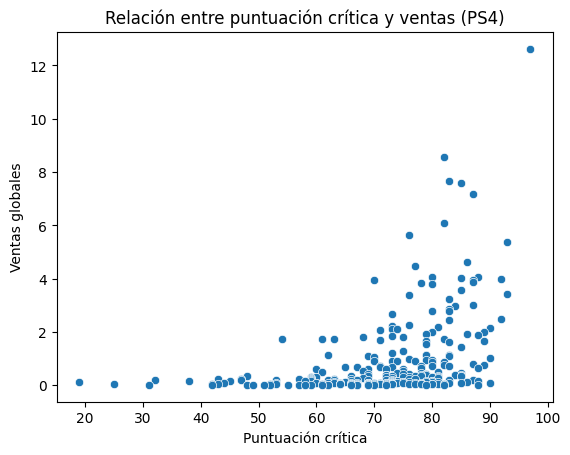

In [69]:
ps4_juegos = juegos[juegos['platform'] == 'PS4']
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_juegos)
plt.title('Relación entre puntuación crítica y ventas (PS4)')
plt.xlabel('Puntuación crítica')
plt.ylabel('Ventas globales')
plt.show()


$Paso 3. Analiza los datos$

$-Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?$


$-Observa cómo varían las ventas de una plataforma a otra.$ 


$-Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.
 -Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?$


$-Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.$


-Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.


$-¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.$


$-Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.$


$-Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).$ 
$-Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.$


-Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.


-Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?



-Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

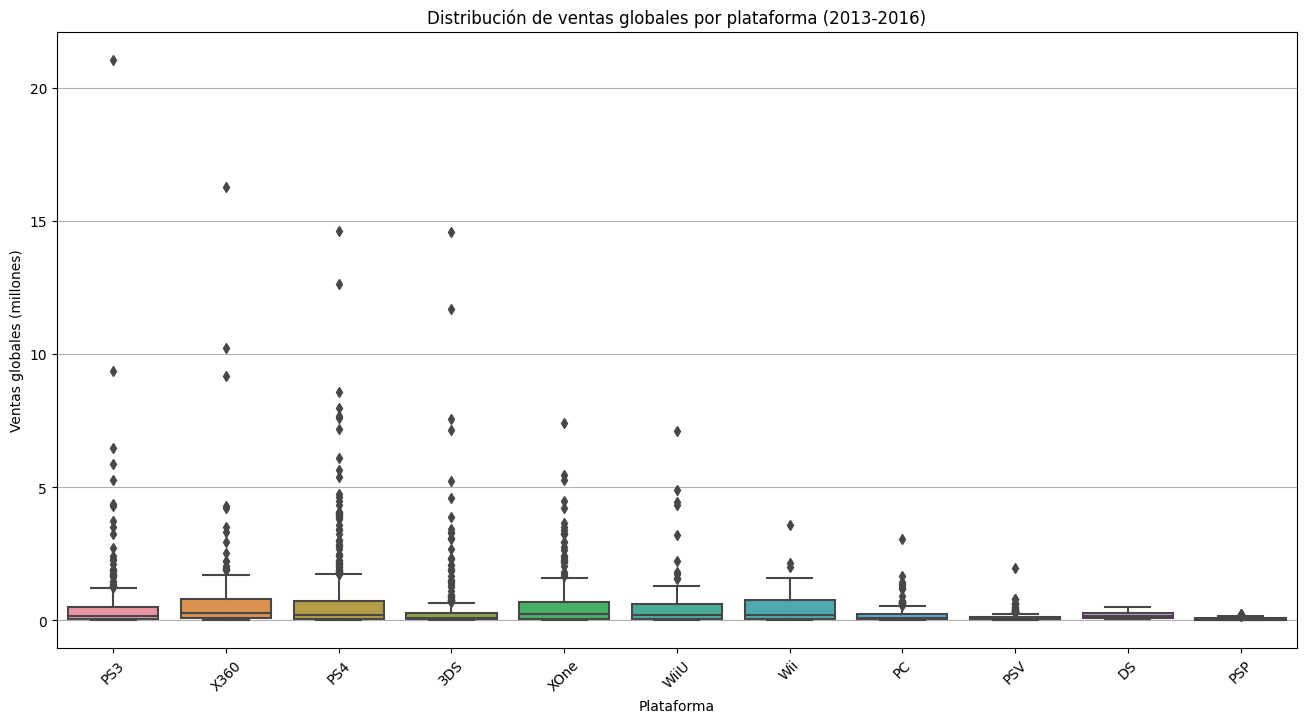

In [70]:
juegos['year_of_release'] = juegos['year_of_release'].dropna().astype(int)

# Filtramos juegos del período reciente
datos_recientes = juegos[(juegos['year_of_release'] >= 2013) & (juegos['year_of_release'] <= 2016)]
plt.figure(figsize=(16,8))
sns.boxplot(data=datos_recientes, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

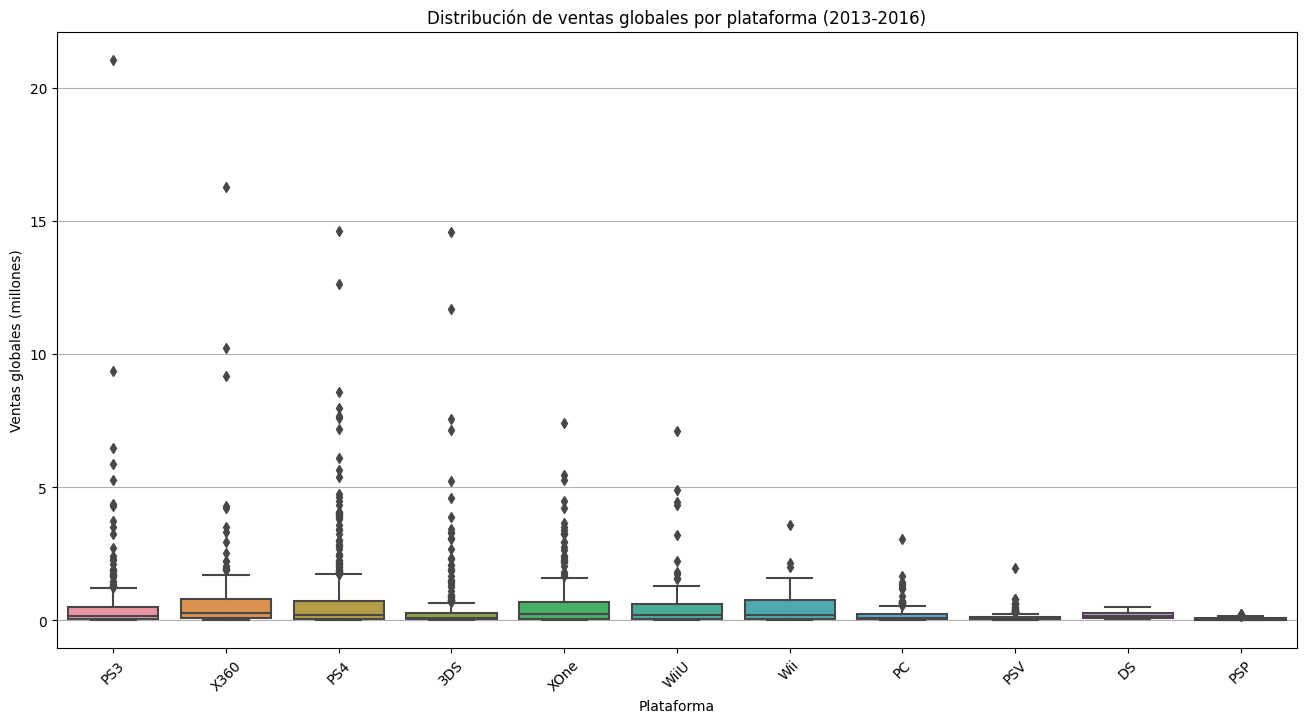

In [71]:
plt.figure(figsize=(16,8))
sns.boxplot(data=datos_recientes, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Paso 4. Crea un perfil de usuario para cada región

-Para cada región (NA, UE, JP) determina:

-Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
-Los cinco géneros principales. Explica la diferencia.
-Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.


In [72]:
# Función para obtener el top 5 por región
def top_5(region):
    return juegos.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

print("Top 5 plataformas en NA:")
print(top_5('na_sales'))

print("\nTop 5 plataformas en EU:")
print(top_5('eu_sales'))

print("\nTop 5 plataformas en JP:")
print(top_5('jp_sales'))



Top 5 plataformas en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


-Los cinco géneros principales. Explica la diferencia.

In [73]:
top_5_generos = juegos['genre'].value_counts().head(5)
top_5_generos

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Name: genre, dtype: int64

In [74]:
juegos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No clasificado,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No clasificado,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No clasificado,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No clasificado,0.01


In [75]:
juegos['genre'] 

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16710          Action
16711          Sports
16712       Adventure
16713        Platform
16714      Simulation
Name: genre, Length: 16715, dtype: object

-Si las clasificaciones de (raiting)ESRB afectan a las ventas en regiones individuales.

In [76]:
juegos['rating'].drop_duplicates()



0                     E
1        No clasificado
16                    M
39                    T
61                 E10+
656                 K-A
875                  AO
4297                 EC
13672                RP
Name: rating, dtype: object

In [77]:
esrb_por_region = juegos.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales','other_sales','total_sales']].sum()
print(esrb_por_region)

                na_sales  eu_sales  jp_sales  other_sales  total_sales
rating                                                                
AO                  1.26      0.61      0.00         0.09         1.96
E                1292.99    710.25    198.11       234.17      2435.52
E10+              353.32    188.52     40.20        73.56       655.60
EC                  1.53      0.11      0.00         0.11         1.75
K-A                 2.56      0.27      1.46         0.03         4.32
M                 748.48    483.97     64.24       177.10      1473.79
No clasificado   1242.46    613.83    841.96       151.08      2849.33
RP                  0.00      0.08      0.00         0.01         0.09
T                 759.75    427.03    151.40       155.17      1493.35


agrupar,sumar y graficar

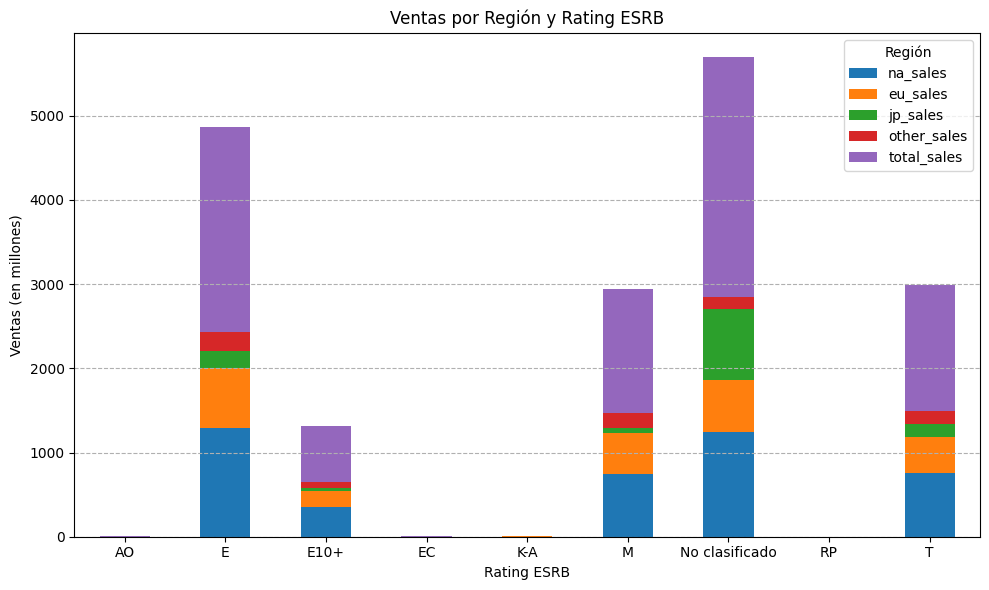

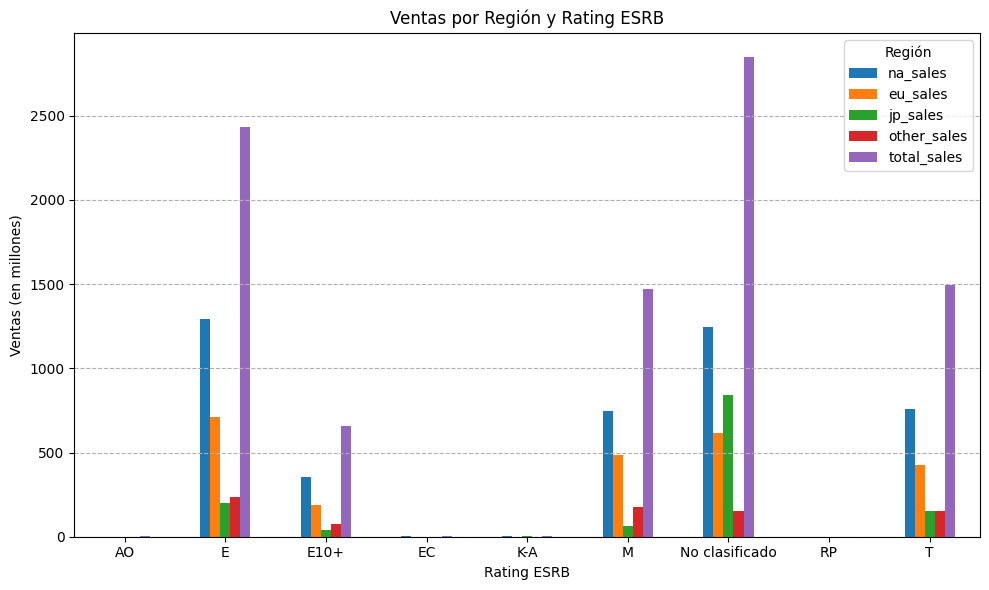

In [78]:
esrb_por_region.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Ventas por Región y Rating ESRB')
plt.xlabel('Rating ESRB')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=0)
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# gráficos de barras agrupadas para comparar las regiones por rating
esrb_por_region.plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por Región y Rating ESRB')
plt.xlabel('Rating ESRB')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=0)
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

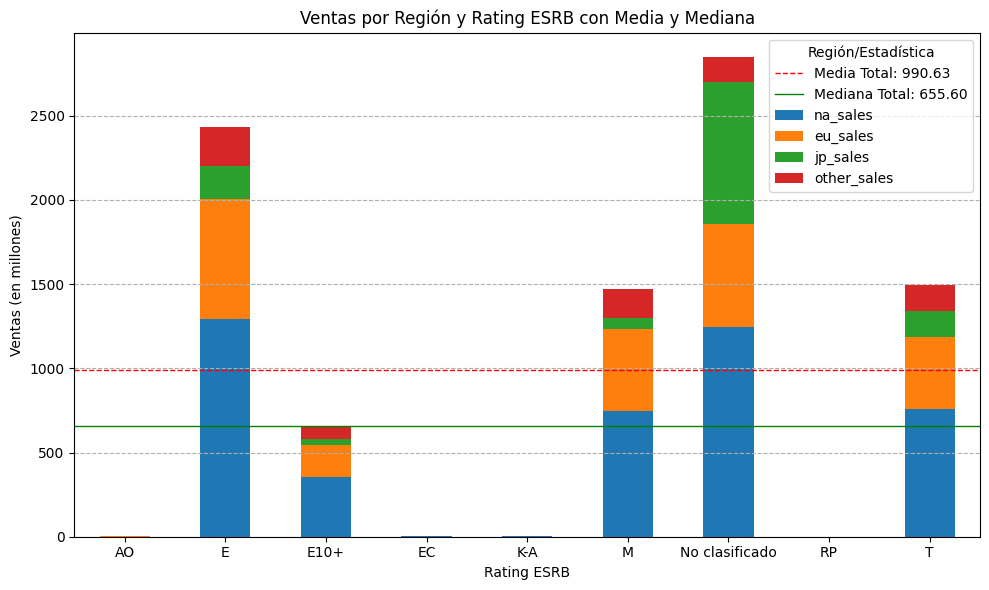

In [79]:
(esrb_por_region)

# Calcular la media y la mediana de las ventas totales por rating
media_total = esrb_por_region['total_sales'].mean()
mediana_total = esrb_por_region['total_sales'].median()

# Generar el gráfico de barras apiladas
ax = esrb_por_region[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir líneas para la media y la mediana
ax.axhline(media_total, color='r', linestyle='--', linewidth=1, label=f'Media Total: {media_total:.2f}')
ax.axhline(mediana_total, color='g', linestyle='-', linewidth=1, label=f'Mediana Total: {mediana_total:.2f}')

plt.title('Ventas por Región y Rating ESRB con Media y Mediana')
plt.xlabel('Rating ESRB')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=0)
plt.legend(title='Región/Estadística')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# También podríamos añadir la media y mediana por rating individualmente
# Si prefieres esta visualización, házmelo saber y te proporcionaré el código.

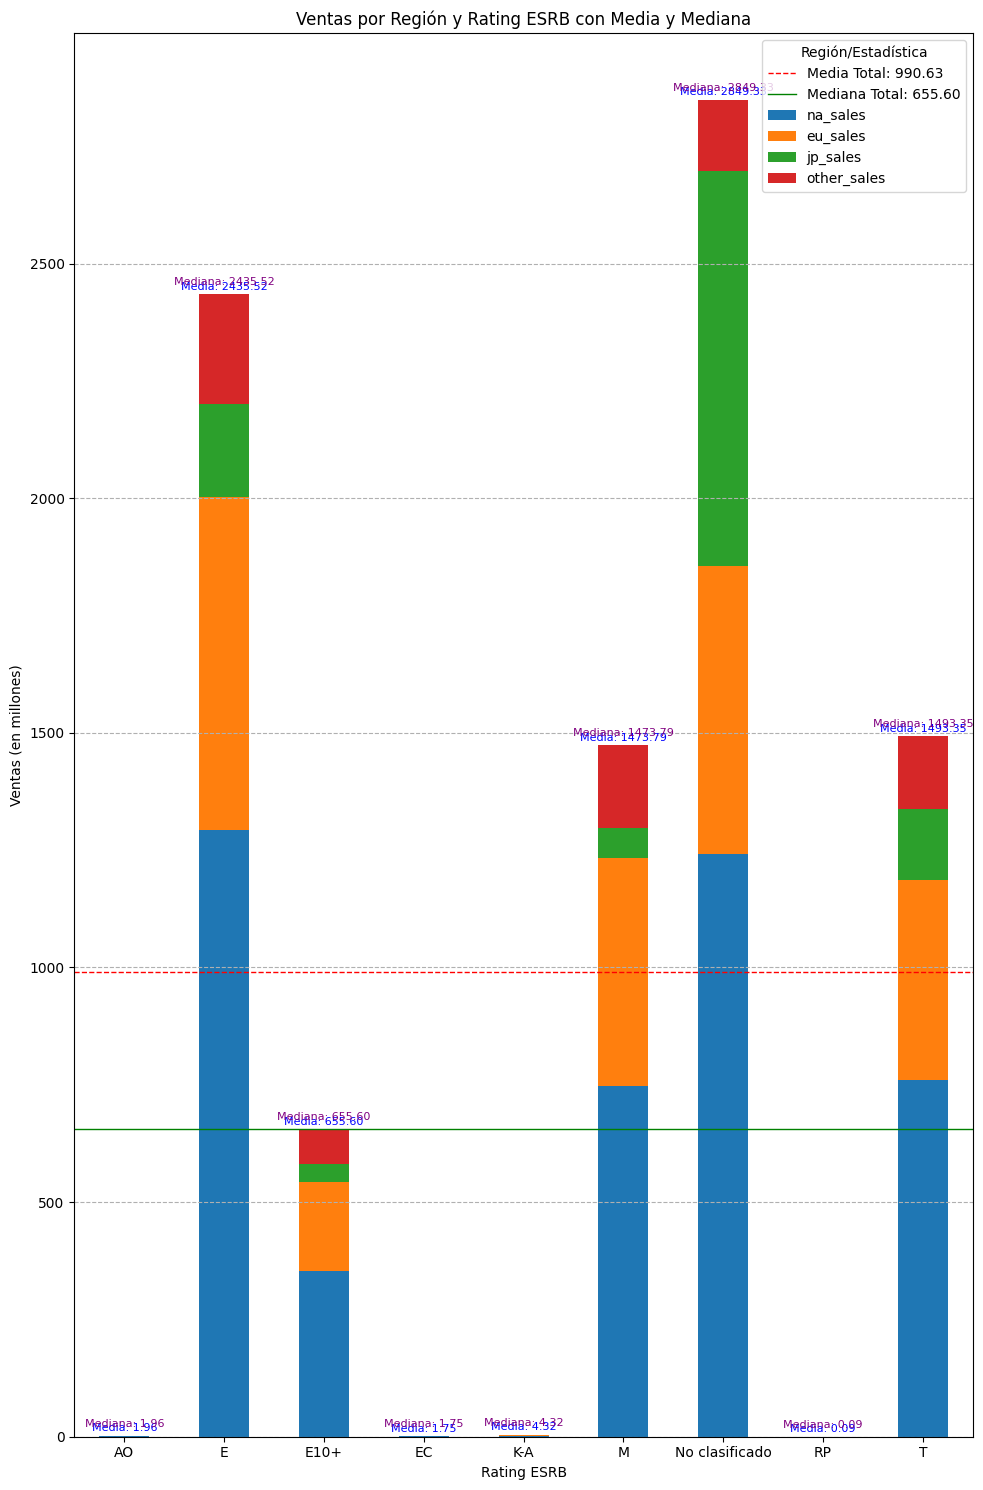

In [80]:
# Calcular la media y la mediana de las ventas totales por rating
media_por_rating = esrb_por_region['total_sales'].mean()
mediana_por_rating = esrb_por_region['total_sales'].median()

# Generar el gráfico de barras apiladas
ax = esrb_por_region[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].plot(kind='bar', stacked=True, figsize=(10, 15))

# Añadir anotaciones para la media y la mediana de las ventas totales (global)
ax.axhline(media_por_rating, color='r', linestyle='--', linewidth=1, label=f'Media Total: {media_por_rating:.2f}')
ax.axhline(mediana_por_rating, color='g', linestyle='-', linewidth=1, label=f'Mediana Total: {mediana_por_rating:.2f}')

# Añadir anotaciones para la media y la mediana de las ventas totales por cada rating
for i, rating in enumerate(esrb_por_region.index):
    total_sales = esrb_por_region.loc[rating, 'total_sales']
    media_rating = esrb_por_region['total_sales'].loc[rating] # Aquí la media es la misma que el valor total ya que solo hay un dato por rating después del groupby
    mediana_rating = esrb_por_region['total_sales'].loc[rating] # Ídem para la mediana
    ax.text(i, total_sales + 5, f'Media: {media_rating:.2f}', ha='center', va='bottom', fontsize=8, color='blue')
    ax.text(i, total_sales + 15, f'Mediana: {mediana_rating:.2f}', ha='center', va='bottom', fontsize=8, color='purple')

plt.title('Ventas por Región y Rating ESRB con Media y Mediana')
plt.xlabel('Rating ESRB')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=0)
plt.legend(title='Región/Estadística')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

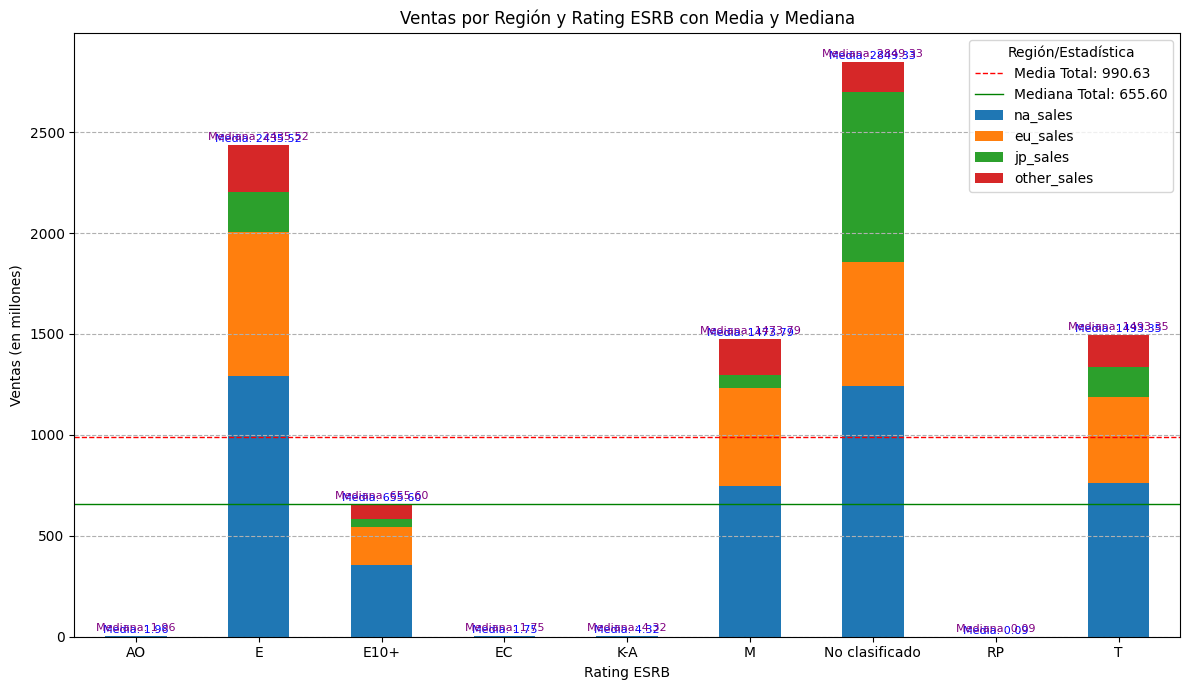

In [81]:
(esrb_por_region)
# Calcular la media y la mediana de las ventas totales por rating
media_por_rating = esrb_por_region['total_sales'].mean()
mediana_por_rating = esrb_por_region['total_sales'].median()

# Generar el gráfico de barras apiladas
ax = esrb_por_region[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].plot(kind='bar', stacked=True, figsize=(12, 7))

# Añadir anotaciones para la media y la mediana de las ventas totales (global)
ax.axhline(media_por_rating, color='r', linestyle='--', linewidth=1, label=f'Media Total: {media_por_rating:.2f}')
ax.axhline(mediana_por_rating, color='g', linestyle='-', linewidth=1, label=f'Mediana Total: {mediana_por_rating:.2f}')

# Añadir anotaciones para la media y la mediana de las ventas totales por cada rating
for i, rating in enumerate(esrb_por_region.index):
    total_sales = esrb_por_region.loc[rating, 'total_sales']
    media_rating = esrb_por_region['total_sales'].loc[rating] # Aquí la media es la misma que el valor total ya que solo hay un dato por rating después del groupby
    mediana_rating = esrb_por_region['total_sales'].loc[rating] # Ídem para la mediana
    ax.text(i, total_sales + 5, f'Media: {media_rating:.2f}', ha='center', va='bottom', fontsize=8, color='blue')
    ax.text(i, total_sales + 15, f'Mediana: {mediana_rating:.2f}', ha='center', va='bottom', fontsize=8, color='purple')

plt.title('Ventas por Región y Rating ESRB con Media y Mediana')
plt.xlabel('Rating ESRB')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=0)
plt.legend(title='Región/Estadística')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.
Explica:.
[Si p ≤ α, se rechaza la hipótesis nula (resultados significativos).
Si p > α, no se rechaza la hipótesis nula.]

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [82]:
juegos

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No clasificado,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No clasificado,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No clasificado,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No clasificado,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No clasificado,0.01


'<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, este análisis es importante, siempre hay que crear perfiles de usuario para entender cómo usan el producto que se está analizando
</div>

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [83]:
juegos['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [84]:

xbox_one_games = juegos[juegos['platform'] == 'XOne']

# Calcular el promedio de las calificaciones de los usuarios para Xbox One
promedio_xbox_one = xbox_one_games['user_score'].mean()

# Filtrar el DataFrame para obtener solo las filas donde la plataforma es 'PC'
pc_games = juegos[juegos['platform'] == 'PC']

# Calcular el promedio de las calificaciones de los usuarios para PC
promedio_pc = pc_games['user_score'].mean()
print(promedio_pc)
print(promedio_xbox_one)

7.062467532467533
6.521428571428572


In [85]:
alpha = 0.05# tu código: establece un nivel crítico de significación estadística

muestra1=xbox_one_games['user_score'].fillna(0)
muestra2=pc_games['user_score'].fillna(0)

results = st.ttest_ind(muestra1,muestra2, equal_var=False)# tu código: prueba la hipótesis de que las medias 
print('valor p:',results.pvalue) # tu código: imprime el valor p obtenido)

if (results.pvalue < alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.0005315801015576501
Rechazamos la hipótesis nula


In [86]:
muestra2

85       7.6
138      7.3
192      4.0
195      0.0
218      8.2
        ... 
16690    0.0
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 974, dtype: float64

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [87]:
genero_accion = juegos[juegos['genre'] == 'Action']

# Calcular el promedio de las calificaciones de los usuarios para 
promedio_genero_accion =genero_accion['user_score'].mean()

# Filtrar el DataFrame para obtener solo las filas donde la plataforma es 
genero_sports = juegos[juegos['genre'] == 'Sports']

# Calcular el promedio de las calificaciones de los usuarios para 
promedio_sport = genero_sports['user_score'].mean()
print(promedio_sport)
print(promedio_genero_accion)

6.96119673617407
7.054043715846995


In [88]:

alpha = 0.05# tu código: establece un nivel crítico de significación estadística

muestra1=genero_accion['user_score'].fillna(0)
muestra2=genero_sports['user_score'].fillna(0)

results = st.ttest_ind(muestra1,muestra2, equal_var=False)# tu código: prueba la hipótesis de que las medias 
print('valor p:',results.pvalue) # tu código: imprime el valor p obtenido)

if (results.pvalue < alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.1599167086071376e-08
Rechazamos la hipótesis nula


Hipótesis Nula (H₀): No hay una diferencia significativa en las calificaciones promedio de los usuarios entre los juegos de Xbox One y los juegos de PC en tu conjunto de datos. Dicho de otra manera, las medias de las calificaciones para ambas plataformas son iguales.

Hipótesis Alternativa (H₁): Existe una diferencia significativa en las calificaciones promedio de los usuarios entre los juegos de Xbox One y los juegos de PC en tu conjunto de datos. Dicho de otra manera, las medias de las calificaciones para ambas plataformas no son iguales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicada las pruebas estadísticas para revisar las diferencias. Es importante comprobar esto de manera matemática para tener una mayor seguridad de que las diferencias vistas no es algo aleatorio.
</div>

Establece tu mismo el valor de umbral alfa. Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.
ejemplo:[Si p ≤ α, se rechaza la hipótesis nula (resultados significativos).
Si p > α, no se rechaza la hipótesis nula.]

explicacion de la formulacion de las hipotesis nula y alternativas y su criterios de prueba:

Comparación de las puntuaciones de usuarios entre juegos de Xbox One y PC:

Hipótesis Nula (H 0): La hipótesis nula que se está probando implícitamente es que no hay una diferencia significativa en la media de las puntuaciones de los usuarios entre los juegos de Xbox One y los juegos de PC. Formalmente, esto se puede escribir como:

μXbox_One=μPC

donde μXbox_One representa la media de las puntuaciones de los usuarios para los juegos de Xbox One, y μPC
representa la media de las puntuaciones de los usuarios para los juegos de PC.

Hipótesis Alternativa (H1 o Ha): La hipótesis alternativa es que existe una diferencia significativa en la media de las puntuaciones de los usuarios entre los juegos de Xbox One y los juegos de PC. Formalmente, esto se escribe como:

μXbox_One≠μPC

Criterio para probar las hipótesis y por qué:

El criterio utilizado para probar estas hipótesis es la prueba t de Student para muestras independientes (two-sample t-test), implementada en Python mediante la función st.ttest_ind() del módulo scipy.stats.


Análisis del Código 2: Comparación de las puntuaciones de usuarios entre juegos de Acción y Deportes

Hipótesis Nula (H0): Similar al primer caso, la hipótesis nula que se está probando es que no hay una diferencia significativa en la media de las puntuaciones de los usuarios entre los juegos de Acción y los juegos de Deportes. Formalmente:

μAccion=μDeportes

donde μAccion representa la media de las puntuaciones de los usuarios para los juegos de Acción, y μDeportes
representa la media de las puntuaciones de los usuarios para los juegos de Deportes.

Hipótesis Alternativa (H1 o Ha): La hipótesis alternativa es que existe una diferencia significativa en la media de las puntuaciones de los usuarios entre los juegos de Acción y los juegos de Deportes. Formalmente:

μAccion≠μDeportes
Regla de decisión:

El código compara el valor p obtenido con el nivel de significación estadística (α=0.05).

Si el valor p es menor que α (0.05), se considera que la probabilidad de obtener los resultados observados bajo la hipótesis nula es suficientemente baja. Por lo tanto, se rechaza la hipótesis nula y se concluye que existe una diferencia significativa en las medias de las puntuaciones de los usuarios entre los dos grupos.


Si el valor p es mayor o igual que α (0.05), no hay suficiente evidencia estadística para rechazar la hipótesis nula. Por lo tanto, no se puede rechazar la hipótesis nula, lo que no significa que la hipótesis nula sea verdadera, sino simplemente que los datos no proporcionan suficiente evidencia para concluir que es falsa.


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante: aqui mi correeccion</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hace falta responder esta parte
</div>

Paso 6. Escribe una conclusión general

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

A partir de aquí no es claro lo que se intenta comunicar y tienes celdas con código que tienen errores 
</div>

concluyo que el analisis de datos utilizado en esta base de datos

Que basado en la exploración inicial de los datos de videojuegos, se pueden observar varias tendencias y características clave.

Ventas: Algunos títulos muestran ventas significativamente altas, lo que sugiere la presencia de "éxitos" que dominan el mercado. Las ventas varían entre regiones, lo que indica diferentes preferencias del consumidor según la ubicación.   

Plataformas: La plataforma Wii tiene varios de los juegos más vendidos, lo que indica su popularidad en el período representado en los datos. También hay una fuerte presencia de juegos para las plataformas PS2, PS3 y X360.   

Géneros: Los géneros de deportes, acción y plataforma parecen tener una fuerte representación en términos de número de lanzamientos y ventas. Los juegos de rol también muestran ventas significativas.   

Calificaciones: Las calificaciones de los críticos y usuarios varían, y algunos juegos bien calificados logran altas ventas, mientras que otros no. La calificación ESRB también varía, lo que indica una orientación demográfica diversa para los juegos.
Media y Mediana:Se mide en casi todo para sermas claro en los datos

bueno espero nueva revicion

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios realizados, ahora el notebook es más claro y tiene mejor presentación. Cuando trabajes en equipo es importante que cuides la presentación y ejecución de tus notebooks ya que a menudo tendrás que compartirlos con tus compañeros de equipo y ellos deben poder leer, entender y reproducir tu notebook sin problema.
 
    
    Saludos!
</div>